# 1. Подготовка данных.

In [43]:
import pandas as pd
import numpy as np

Загрузим датасет с численностью населения регионов и посмотрим что он из себя представляет.

In [44]:
population = pd.read_excel('data/population.xlsx')
population.head()

,Unnamed: 0,Unnamed: 1,23110000100030200002 Численность постоянного населения на 1 января,23110000100030200002 Численность постоянного населения на 1 января.1,23110000100030200002 Численность постоянного населения на 1 января.2,23110000100030200002 Численность постоянного населения на 1 января.3,23110000100030200002 Численность постоянного населения на 1 января.4,23110000100030200002 Численность постоянного населения на 1 января.5,23110000100030200002 Численность постоянного населения на 1 января.6,23110000100030200002 Численность постоянного населения на 1 января.7,...,23110000100030200002 Численность постоянного населения на 1 января.14,23110000100030200002 Численность постоянного населения на 1 января.15,23110000100030200002 Численность постоянного населения на 1 января.16,23110000100030200002 Численность постоянного населения на 1 января.17,23110000100030200002 Численность постоянного населения на 1 января.18,23110000100030200002 Численность постоянного населения на 1 января.19,23110000100030200002 Численность постоянного населения на 1 января.20,23110000100030200002 Численность постоянного населения на 1 января.21,23110000100030200002 Численность постоянного населения на 1 января.22,23110000100030200002 Численность постоянного населения на 1 января.23
0,NaN,NaN,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
1,все население,w2:p_mest:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Российская Федерация,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Раздел 1. Муниципальные образования субъектов ...,00000000000,147539426,146890128,146303611,145649334,144963650,144333586,143801046,143236582,...,143347059,143666931,146267288,146544710,146804372,146880432,146780720,146748590,146171015,145557576
4,Центральный федеральный округ,030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Нужно изменить названия признаков и удалить лишний столбец с кодами. Также удалим данные старее восьми лет.

In [45]:
population = population.drop (columns=population.columns[1], axis=1)

list_col = population.iloc[[0]].values.tolist()[0]
population.columns = list_col
population = population.iloc[2:].reset_index(drop= True)

population.rename(columns={np.nan:'region'}, inplace = True)

population.drop(population.columns[1:17], axis=1, inplace=True)

Из первого знакомства мы видим, что данные каждого региона представленны двумя строками. Нам следует свести каждый регион в одну строку, но сначала посмотрим сколько в датасете строк.

In [46]:
count_data = population.shape[0]
print(f'Строк в датасете:{count_data}')

Строк в датасете:367


Строк в датасете слишком много, с учетом нахождения в датасете 85 регионов (на январь 2022г). Посмотрим все наименования субъектов представленне в таблице.

In [47]:
population['region'].unique()

array(['Российская Федерация',
       'Раздел 1. Муниципальные образования субъектов Российской Федерации',
       'Центральный федеральный округ', 'Белгородская область',
       'Брянская область', 'Владимирская область', 'Воронежская область',
       'Ивановская область', 'Калужская область', 'Костромская область',
       'Курская область', 'Липецкая область', 'Московская область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область', 'Тверская область', 'Тульская область',
       'Ярославская область',
       'Город Москва столица Российской Федерации город федерального значения',
       'Северо-Западный федеральный округ', 'Республика Карелия',
       'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ (Архангельская область)',
       'Архангельская область (кроме Ненецкого автономного округа)',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
      

В датасете явно лишние строки содержащие поселения алтайского края. Кроме этого присутствуют названия федеральных округов. Оставим в датасете только всю страну, субъекты Российской федерации  и строки содержащие численность населения (начинаются с предложения "Раздел 1").

In [48]:
subject_list = [
    'Раздел 1', 'край', 'Республика', 'федерального значения',
    'автономный округ', 'область', 'Российская Федерация',
    'федеральный округ', 'Коми-Пермяцкий', 'Усть-Ордынский',
    'Корякский'
    ]
population = population[
    population['region'].str.contains('|'.join(subject_list))==True
    ].reset_index(drop=True)

Проверим осталось ли чередование строк в порядке "название - численность".

In [49]:
# создадим функцию проверки
def alt_check(subjects):
  extra = 'Раздел 1. Муниципальные образования субъектов Российской Федерации'
  for n in range(len(subjects)):
    if n%2 == 0:
      if subjects[n] != extra:
        continue
      else:
        return(f'В строке {n} должно быть название')
    else:
      if subjects[n] == extra:
        continue
      else:
        return(f'В строке {n} должна быть численность')
  return('Датасет соответствует условию')

# запускаем проверку
print(alt_check(population['region']))

Датасет соответствует условию


Перенесем численность населения в строки с названиями и удалим ненужные.

In [50]:
# создадим функцию для удаления лишних ячеек
def del_rows(df):
  for n in range(len(df)):
    if n%2 == 0:
      df.iloc[n, 1:] = df.iloc[n+1, 1:]
  df = df.drop(index=(range(1,len(df), 2)))
  return df

population = del_rows(population)

Проверим сколько осталось строк в таблице

In [51]:
count_data = population.shape[0]
print(f'Строк в датасете: {count_data}')

Строк в датасете: 107


Строк всё ещё много. Удалим общую численность населения страны, а также избавимся от данных по федеральным округам.

In [52]:
subject_list = ['Российская Федерация', 'федеральный округ']
population = population[
    population['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

In [53]:
count_data = population.shape[0]
print(f'Строк в датасете: {count_data}')

Строк в датасете: 93


В преобразованной таблице по-прежнему много строк. Это связанно с тем что в нем присутствуют субъекты не являющиеся самостоятельными в составе РФ на январь 2022 года. До 2008 года в стране прошло несколько референдумов по присоединению некоторых автономных округов к более развитым регионам. Для более лучшего совпадения с датасетами, основанными на данных новее 2008 года, оставим Забайкальский, Красноярский, Камчатский, Пермский края, а так же Иркутскую область, не рассматривая отдельно их автономные округа. Архангельскую и Тюменскую области будем рассматривать отдельно от их автономных округов, поскольку последние считаются самостоятельными субъектами Российской Федерации.  

In [54]:
subject_list = [
    'Коми-Пермяцкий', 'Бурятский', 'Корякский', 'Таймырский', 'Эвенкийский'
    ]
population = population[
    population['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

#переименуем слишком длинные названия для удобства
old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Ненецкий автономный округ (Архангельская область)',
    'Архангельская область',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Адыгея (Адыгея)',
    'Кемеровская область - Кузбасс',
    'Республика Северная Осетия-Алания',
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Адыгея',
    'Кемеровская область',
    'Республика Северная Осетия - Алания',
    ]
population = population.replace(old_name_list, new_name_list)

#удалим ненужные строки
population = population[
    population['region'].str.contains('del')==False
    ].reset_index(drop=True)

In [55]:
count_data = population.shape[0]
print(f'Строк в датасете: {count_data}')

Строк в датасете: 85


Теперь количество строк соответствует количеству регионов. Назначим значения первой колонки индексами.

In [56]:
population.set_index('region', inplace=True)

Выясним количество пропусков в полученном датафрейме.

In [57]:
sum_na = population.isna().sum().sum()
print(f'Пропусков в датафрейме: {sum_na:.0f}')

Пропусков в датафрейме: 0


Выведем среднегодовую численность населения по регионам.

In [58]:
pop_mean = pd.DataFrame(
    population.mean(axis=1), columns=['Численность населения']
    ).sort_index()
pop_mean

,Численность населения
region,
Алтайский край,2.336480e+06
Амурская область,7.941684e+05
Архангельская область,1.106024e+06
Астраханская область,1.010418e+06
Белгородская область,1.546320e+06
...,...
Ямало-Ненецкий автономный округ,5.417169e+05
Ярославская область,1.257721e+06
г. Москва,1.249984e+07


Загрузим данные показывающие процент людей живущих за чертой бедности.

In [59]:
poverty_percent = pd.read_csv('data/poverty_percent_by_regions_1992_2020.csv')
poverty_percent.head()


,region,year,poverty_percent
0,Российская Федерация,1992,33.5
1,Российская Федерация,1993,31.3
2,Российская Федерация,1994,22.4
3,Российская Федерация,1995,24.8
4,Российская Федерация,1996,22.1


Выясним количество пропусков в датафрейме

In [60]:
sum_na = poverty_percent.isna().sum().sum()
print(f'Пропусков в датафрейме: {sum_na:.0f}')

Пропусков в датафрейме: 0


Сгруппируем данные по регионам, начиная с 2015 года. Посчитаем средний процент бедных людей для каждого региона.

In [61]:
mask = poverty_percent.year > 2014
mean_pov_percent = pd.DataFrame(
    poverty_percent[mask].groupby('region')['poverty_percent'].mean().reset_index()
    )

Приведем датафрейм к общему виду

In [62]:
subject_list = ['Российская Федерация', 'федеральный округ']
mean_pov_percent = mean_pov_percent[
    mean_pov_percent['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

mean_pov_percent.region = mean_pov_percent.region.str.strip()
mean_pov_percent = mean_pov_percent.replace(old_name_list, new_name_list)
mean_pov_percent = mean_pov_percent[
    mean_pov_percent['region'].str.contains('del')==False
    ].reset_index(drop=True)

# переименуем признак
mean_pov_percent = mean_pov_percent.rename(
    columns={'poverty_percent':'% за чертой бедности'}
    )

#назначим названия регионов индексами
mean_pov_percent = mean_pov_percent.set_index('region').sort_index()

Узнаем количество строк в преобразованной таблице.

In [63]:
count_data = mean_pov_percent.shape[0]
print(f'Строк в датасете: {count_data}')

Строк в датасете: 85


In [64]:
mean_pov_percent

,% за чертой бедности
region,
Алтайский край,17.633333
Амурская область,15.900000
Архангельская область,13.750000
Астраханская область,15.333333
Белгородская область,7.816667
...,...
Ямало-Ненецкий автономный округ,6.133333
Ярославская область,10.483333
г. Москва,7.316667


Загрузим данные по числу умерших на первом году жизни по регионам в сельской местности.

In [65]:
cm_rulal = pd.read_excel('data/child_mortality_rural_1990_2021.xls')
cm_rulal.head()

,"Число умерших на первом году жизни детей за год (человек, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Российская Федерация,Оба пола,сельское население,11186.0,10943.0,10111.0,9840.0,9010.0,8582.0,7983.0,...,5463.0,5059.0,4681.0,4165.0,3568.0,3032.0,2521.0,2122.0,1916.0,1852.0
3,Центральный федеральный округ,Оба пола,сельское население,1615.0,1550.0,1361.0,1426.0,1347.0,1321.0,1200.0,...,625.0,608.0,487.0,490.0,426.0,347.0,291.0,211.0,228.0,212.0
4,Белгородская область,Оба пола,сельское население,103.0,92.0,75.0,79.0,80.0,72.0,72.0,...,43.0,48.0,41.0,42.0,36.0,34.0,33.0,16.0,22.0,20.0


Проведем преобразования датасета.

In [66]:
cm_rulal = cm_rulal.drop(columns=cm_rulal.columns[1:3], axis= 1)

list_col = cm_rulal.iloc[[1]].values.tolist()[0]  # список названий
list_col[0] = 'region'  # переименуем безымянное название
cm_rulal.columns = list_col

cm_rulal = cm_rulal.iloc[2:].reset_index(drop= True)  # убираем ненужную сроку

cm_rulal.drop(cm_rulal.columns[1:26], axis=1, inplace=True) #оставляем данные с 2015 года

In [67]:
subject_list = ['Российская Федерация', 'район', 'федеральный округ']
cm_rulal = cm_rulal[
    cm_rulal['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

cm_rulal['region'] = cm_rulal['region'].str.strip()

subject_list = [
    'Коми-Пермяцкий', 'Бурятский',
    'Корякский', 'Таймырский',
    'Эвенкийский', 'Чеченская и Ингушская'
    ]
cm_rulal = cm_rulal[
    cm_rulal['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

cm_rulal = cm_rulal.replace(old_name_list, new_name_list)

cm_rulal = cm_rulal[
    cm_rulal['region'].str.contains('del')==False
    ].reset_index(drop=True)

# назначим названия регионов индексами
cm_rulal.set_index('region', inplace=True)

Выясним количество строк в получившемся датафрейме.

In [68]:
count_data = cm_rulal.shape[0]
print(f'Строк в датасете: {count_data}')

Строк в датасете: 85


Выясним количество пропусков в датафрейме.

In [69]:
sum_na = cm_rulal.isna().sum().sum()
print(f'Пропусков в датафрейме: {sum_na:.0f}')

Пропусков в датафрейме: 1


Найдем пропущенное значение.

In [70]:
#создадим функцию для выявления индексов строк с пропусками
def val_row (df):
    idx_list = []
    for n in range(len(df)):
      if any(df.iloc[n].isna()):
        idx_list.append(n)
    return idx_list
val_row(cm_rulal)

[60]

In [71]:
cm_rulal.iloc[60]

2015.0    10.0
2016.0     8.0
2017.0    15.0
2018.0     5.0
2019.0     4.0
2020.0     5.0
2021.0     NaN
Name: Ханты-Мансийский автономный округ - Югра, dtype: float64

Поскольку в дальнейшем данные будут усреднятся с помощью функции mean(), заполнять пропущенные значения, тем более средним по региону не имеет смысла.

Вычислим ежегодное среднее для каждого региона.

In [72]:
cm_rul = pd.DataFrame(cm_rulal.mean(axis=1), columns=['Средняя смертность СМ']).sort_index()

In [73]:
cm_rul

,Средняя смертность СМ
region,
Алтайский край,68.000000
Амурская область,19.285714
Архангельская область,15.571429
Астраханская область,18.428571
Белгородская область,29.000000
...,...
Ямало-Ненецкий автономный округ,16.571429
Ярославская область,14.000000
г. Москва,9.714286


Загрузим данные по числу умерших на первом году жизни в городской местности

In [74]:
cm_urban = pd.read_excel('data/child_mortality_urban_1990_2021.xls')
cm_urban

,"Число умерших на первом году жизни детей за год (человек, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Российская Федерация,Оба пола,городское население,23902.0,21549.0,19097.0,18106.0,17131.0,16258.0,14842.0,...,10843.0,10418.0,9641.0,8499.0,7860.0,6545.0,5723.0,5206.0,4573.0,4664.0
3,Центральный федеральный округ,Оба пола,городское население,5317.0,4734.0,4175.0,3899.0,3871.0,3631.0,3254.0,...,2789.0,2735.0,2402.0,2228.0,2146.0,1785.0,1593.0,1409.0,1153.0,1192.0
4,Белгородская область,Оба пола,городское население,209.0,198.0,165.0,165.0,153.0,131.0,102.0,...,84.0,68.0,62.0,68.0,72.0,43.0,40.0,23.0,25.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Северо-Кавказский район,Оба пола,городское население,2591.0,2594.0,2433.0,2112.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Уральский район,Оба пола,городское население,3402.0,3044.0,2707.0,2626.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Западно-Сибирский район,Оба пола,городское население,2645.0,2404.0,2132.0,2095.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Восточно-Сибирский район,Оба пола,городское население,1898.0,1794.0,1498.0,1518.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Преобразуем данные, оставив лишь нужные года и регионы

In [75]:
cm_urban = cm_urban.drop(columns=cm_urban.columns[1:3], axis= 1)

list_col = cm_urban.iloc[[1]].values.tolist()[0]
list_col[0] = 'region'
cm_urban.columns = list_col

cm_urban = cm_urban.iloc[2:].reset_index(drop= True)

cm_urban.drop(cm_urban.columns[1:26], axis=1, inplace=True) #оставляем данные с 2015 года

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
cm_urban = cm_urban[
    cm_urban['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

cm_urban['region'] = cm_urban['region'].str.strip()

subject_list = [
    'Коми-Пермяцкий', 'Бурятский', 'Корякский',
    'Таймырский', 'Эвенкийский', 'Чеченская и Ингушская'
    ]
cm_urban = cm_urban[
    cm_urban['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

cm_urban = cm_urban.replace(old_name_list, new_name_list)

cm_urban = cm_urban[
    cm_urban['region'].str.contains('del')==False
    ].reset_index(drop=True)

# назначим названия регионов индексами
cm_urban.set_index('region', inplace=True)

Вычислим ежегодное среднее для каждого региона.

In [76]:
cm_urb = pd.DataFrame(
    cm_urban.mean(axis=1), columns=['Средняя смертность ГМ']
    ).sort_index()

In [77]:
cm_urb

,Средняя смертность ГМ
region,
Алтайский край,88.142857
Амурская область,30.857143
Архангельская область,42.571429
Астраханская область,57.000000
Белгородская область,43.571429
...,...
Ямало-Ненецкий автономный округ,25.714286
Ярославская область,44.285714
г. Москва,665.857143


Загрузим таблицу отражающую среднедушевые денежные доходы населения.

In [78]:
cash_income = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx')
cash_income.head()

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,302541.0,30865.0,31897.0,33266.0,35338.0,36073.0
1,Центральный\n федеральный округ,38832.0,40200.0,41897.0,44009.0,47252.0,48226.0
2,Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
3,Брянская область,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0
4,Владимирская область,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0


Загрузим таблицу отражающую реальные денежные доходы, в процентах к предыдущему году.

In [79]:
real_incomes = pd.read_excel(
    'data/cash_real_income_wages_2015_2020.xlsx',
    sheet_name='real_incomes'
    )
real_incomes.head()

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,96.42,95.5,99.8,101.4,101.7,98.6
1,Центральный\n федеральный округ,96.20,96.5,100.3,101.8,102.7,98.7
2,Белгородская область,99.30,100.8,99.1,98.7,100.6,98.1
3,Брянская область,97.00,95.0,99.4,102.1,100.5,96.3
4,Владимирская область,99.50,92.2,100.9,96.4,101.9,98.0


Загрузим таблицу со среднемесячной номинальной начисленной зарплатой.

In [80]:
formal_wage_paid = pd.read_excel(
    'data/cash_real_income_wages_2015_2020.xlsx',
    sheet_name='formal_wage_paid'
    )
formal_wage_paid.head()

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,34030.0,36709.0,39167.0,43724.0,47867.0,51344.0
1,Центральный\n федеральный округ,41961.0,45943.0,48593.0,54689.0,60771.0,65319.0
2,Белгородская область,25456.0,27091.0,29066.0,31852.0,34615.0,37442.0
3,Брянская область,21679.0,22923.0,24743.0,27251.0,29853.0,31946.0
4,Владимирская область,23877.0,25135.0,26975.0,30460.0,33076.0,35240.0


Загрузим данные показывающие реальную начисленную зарплату, в процентах к предыдущему году.

In [81]:
real_pay = pd.read_excel(
    'data/cash_real_income_wages_2015_2020.xlsx',
    sheet_name='real_pay'
    )
real_pay.head()

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,91.01,100.8,102.9,108.5,104.8,103.8
1,Центральный\n федеральный округ,90.3,101.7,101.6,108.8,106.2,104.2
2,Белгородская область,93.2,100.8,104.5,106.8,104.0,104.8
3,Брянская область,89,98.5,103.2,107.0,104.0,102.9
4,Владимирская область,91,99.2,103.6,109.9,103.5,103.0


In [82]:
subject_list = ['Российская Федерация', 'федеральный округ', 'в том числе']
cash_income = cash_income[
    cash_income.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
real_incomes = real_incomes[
    real_incomes.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
formal_wage_paid = formal_wage_paid[
    formal_wage_paid.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
real_pay = real_pay[
    real_pay.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

#переименуем слишком длинные названия для удобства
old_name_list = [
    'Архангельская область без\nавтономного округа',
    'Кабардино-Балкарская\nРеспублика',
    'Карачаево-Черкесская\nРеспублика',
    'Республика Северная\nОсетия-Алания',
    'Архангельская область',
    'Тюменская область без\nавтономных округов',
    'Ханты-Мансийский \nавтономный округ - Югра',
    'Ямало-Ненецкий \nавтономный округ',
    'Тюменская область',
    ]
new_name_list = [
    'Архангельская область',
    'Кабардино-Балкарская Республика',
    'Карачаево-Черкесская Республика',
    'Республика Северная Осетия - Алания',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del'
    ]
cash_income = cash_income.replace(old_name_list, new_name_list)
real_incomes = real_incomes.replace(old_name_list, new_name_list)
formal_wage_paid = formal_wage_paid.replace(old_name_list, new_name_list)
real_pay = real_pay.replace(old_name_list, new_name_list)

cash_income = cash_income[
    cash_income.region.str.contains('del')==False
    ].reset_index(drop=True)
real_incomes = real_incomes[
    real_incomes.region.str.contains('del')==False
    ].reset_index(drop=True)
formal_wage_paid = formal_wage_paid[
    formal_wage_paid.region.str.contains('del')==False
    ].reset_index(drop=True)
real_pay = real_pay[
    real_pay.region.str.contains('del')==False
    ].reset_index(drop=True)

#назначим названия регионов индексами
cash_income.set_index('region', inplace=True)
real_incomes.set_index('region', inplace=True)
formal_wage_paid.set_index('region', inplace=True)
real_pay.set_index('region', inplace=True)

Вычислим ежегодные средние показатели доходов для каждого региона.

In [83]:
cash_inc = pd.DataFrame(
    cash_income.mean(axis=1).round(2), columns=['Среднедушевые доходы']
    ).sort_index()
real_inc = pd.DataFrame(
    real_incomes.mean(axis=1).round(2), columns=['Реальные доходы к прошлому']
    ).sort_index()
form_wage = pd.DataFrame(
    formal_wage_paid.mean(axis=1).round(2), columns=['Номинальная зарплата']
    ).sort_index()
real_pay = pd.DataFrame(
    real_pay.mean(axis=1), columns=['Отношение зарплаты к прошлому году']
    ).sort_index()

/tmp/ipykernel_5613/749453900.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  real_pay.mean(axis=1), columns=['Отношение зарплаты к прошлому году']


In [84]:
cash_inc

,Среднедушевые доходы
region,
Алтайский край,22480.83
Амурская область,30861.50
Архангельская область,31840.00
Астраханская область,23899.50
Белгородская область,30692.50
...,...
Ямало-Ненецкий автономный округ,78070.50
Ярославская область,27634.67
г. Москва,68295.00


In [85]:
real_inc

,Реальные доходы к прошлому
region,
Алтайский край,98.10
Амурская область,98.95
Архангельская область,97.85
Астраханская область,96.60
Белгородская область,99.43
...,...
Ямало-Ненецкий автономный округ,102.17
Ярославская область,97.40
г. Москва,99.88


In [86]:
form_wage

,Номинальная зарплата
region,
Алтайский край,24598.00
Амурская область,41014.33
Архангельская область,43617.17
Астраханская область,31866.50
Белгородская область,30920.33
...,...
Ямало-Ненецкий автономный округ,93313.33
Ярославская область,32216.33
г. Москва,81277.67


In [87]:
real_pay

,Отношение зарплаты к прошлому году
region,
Алтайский край,104.00
Амурская область,104.94
Архангельская область,104.02
Астраханская область,104.82
Белгородская область,104.18
...,...
Ямало-Ненецкий автономный округ,104.18
Ярославская область,102.24
г. Москва,104.40


Загрузим данные по числу людей с инвалидностью по регионам, по месяцам, по возрастным группам.

In [88]:
disabled_total_by_age = pd.read_csv('data/disabled_total_by_age_2017_2022.csv')
disabled_total_by_age.head()

,region,total,18_30,31_40,41_50,51_60,60_,date
0,Российская Федерация,11640873.0,550895.0,766054.0,1030652.0,2135436.0,7157836.0,2017-01-01
1,Центральный федеральный округ,3420310.0,118579.0,172662.0,257484.0,598102.0,2273483.0,2017-01-01
2,Белгородская область,223030.0,6318.0,10383.0,16596.0,37444.0,152289.0,2017-01-01
3,Брянская область,110418.0,4215.0,6568.0,10230.0,21481.0,67924.0,2017-01-01
4,Владимирская область,133352.0,4454.0,6811.0,9606.0,23322.0,89159.0,2017-01-01


In [89]:
subject_list = [
    'Российская Федерация', 'федеральный округ',
    'район', 'Байконур'
    ]
disabled_total_by_age = disabled_total_by_age[
    disabled_total_by_age.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

In [90]:
#приведем названия к общему виду
old_name_list = [
    'город Москва',
    'город Санкт-Петербург',
    'город Севастополь',
    'Республика Северная Осетия-Алания',
    'Ханты-Мансийский автономный округ',
    ]
new_name_list = [
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Северная Осетия - Алания',
    'Ханты-Мансийский автономный округ - Югра',
    ]
disabled_total_by_age = disabled_total_by_age.replace(
    old_name_list, new_name_list
    )

disabled_total_by_age = disabled_total_by_age.drop (
    columns=disabled_total_by_age.columns[2:], axis= 1
    )

Сгруппируем данные по регионам, и вернем среднее количество людей с инвалидностью по возрастным группам.

In [91]:
dt_by_age = pd.DataFrame(
    disabled_total_by_age.groupby('region').mean(numeric_only = False).round(2)
    )

Переименуем столбцы

In [92]:
dt_by_age = dt_by_age.rename(columns={
    'total':'Люди с инвалидностью'
    })

In [93]:
dt_by_age

,Люди с инвалидностью
region,
Алтайский край,173039.83
Амурская область,64625.03
Архангельская область,84988.52
Астраханская область,43462.77
Белгородская область,202033.86
...,...
Ямало-Ненецкий автономный округ,13647.44
Ярославская область,101446.30
г. Москва,1006747.45


Загрузим данные по заболеваемости на 100 тыс. населения.

In [94]:
morbidity = pd.read_excel('data/morbidity_2005_2020_age_disease.xls')
morbidity.head()

,"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
2,Российская Федерация,"Беременность, роды и послеродовой период",0-14 лет,21.3,17.6,17.9,22.1,18.1,18.9,16.2,17.7,12.2,12.1,8.1,15.5
3,Российская Федерация,"Беременность, роды и послеродовой период",15-17 лет,1537.3,1527.5,1605.2,1681.5,1618.9,1451.3,1247.6,1229.1,1272.3,1186.5,914.0,794.0
4,Российская Федерация,"Беременность, роды и послеродовой период",18 лет и старше,6731.7,6833.5,7229.7,7516.9,8007.5,8084.4,7981.6,8141.8,8084.6,8219.9,7734.1,7278.6


Преобразуем датафрейм к общему виду.

In [95]:
morbidity = morbidity.drop(columns=morbidity.columns[1], axis= 1)

list_col = morbidity.iloc[[1]].values.tolist()[0]
list_col[0] = 'region'
list_col[1] = 'Возраст'
morbidity.columns = list_col

morbidity = morbidity.iloc[2:].reset_index(drop= True) #убираем ненужную сроку

morbidity.drop(morbidity.columns[2:12], axis=1, inplace=True) #оставляем данные с 2015 года

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
morbidity = morbidity[
    morbidity['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
morbidity = morbidity[
    morbidity['Возраст'].str.contains('Всего')==False
    ].reset_index(drop=True)

#обрежем лишнии пробелы в названиях регионов
morbidity['region'] = morbidity['region'].str.strip()

#переименуем слишком длинные названия
old_name_list = [
    'Архангельская обл. без данных по Ненецкому авт. окр.',
    'Ненецкий автономный округ (Архангельская область)',
    'Республика Адыгея (Адыгея) (до 03.06.2014)',
    'Республика Адыгея (Адыгея)',
    'Архангельская область',
    'Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр.',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Северная Осетия-Алания'
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Республика Адыгея',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'Республика Татарстан',
    'Чувашская Республика',
    'del'
    ]
morbidity = morbidity.replace(old_name_list, new_name_list)

#удалим ненужные строки
morbidity = morbidity[
    morbidity['region'].str.contains('del')==False
    ].reset_index(drop=True)


In [96]:
#посчитаем среднее за интересующие нас годы
morbidity['Среднее количество'] = (morbidity[2015.0] + morbidity[2016.0])/2
morbidity = morbidity.drop(columns=[2015.0, 2016.0], axis=1)

Сгруппируем данные по регионам и возрастным группам, при этом сложим средние показатели заболеваемости.

In [97]:
from pandas.core.frame import Level
morb_df = pd.DataFrame(morbidity.groupby(
    ['region', 'Возраст'])['Среднее количество'].sum().unstack()
    )

Переименуем колонки.

In [98]:
morb_df = morb_df.rename(columns={
    '0-14 лет':'Заболеваемость 0-14 лет',
    '15-17 лет':'Заболеваемость 15-17 лет',
    '18 лет и старше':'Заболеваемость старше 18 лет'
    })

Избавимся от лишнего уровня в названиях столбцов.

In [99]:
morb_df.columns = [tup for tup in morb_df.columns]

In [100]:
morb_df

,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет
region,,,
Алтайский край,357801.05,357655.15,190105.00
Амурская область,391661.20,306407.50,106104.90
Архангельская область,515076.25,389612.15,130403.25
Астраханская область,267954.15,208021.70,92457.65
Белгородская область,296834.00,326478.75,111326.55
...,...,...,...
Ямало-Ненецкий автономный округ,482303.10,329562.70,147662.80
Ярославская область,457903.25,270996.10,119262.80
г. Москва,375225.50,226404.75,84593.50


Загрузим таблицу с расходами на социальную политику от общих расходов бюджета региона, в процентах в год.

In [101]:
welfare_expense = pd.read_excel('data/welfare_expense_share_2015_2020.xlsx')
welfare_expense

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,15.8,16.6,20.4,20.3,19.8,21.3
1,Центральный\n федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
3,Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
4,Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0
...,...,...,...,...,...,...,...
89,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7
90,Магаданская область,9.8,10.6,13.4,12.8,12.3,11.1
91,Сахалинская область,6.4,9.9,16.8,14.3,13.8,16.5
92,Еврейская автономная область,18.4,17.7,28.3,27.8,25.7,31.2


Удалим лишние строки, приведем названия регионов к общему виду.

In [102]:
subject_list = ['Российская Федерация',  'федеральный округ']
welfare_expense = welfare_expense[
    welfare_expense.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

old_name_list = [
    'Кабардино-Балкарская\nРеспублика',
    'Карачаево-Черкесская\nРеспублика',
    'Республика Северная\nОсетия-Алания',
    'Ханты-Мансийский \nавтономный округ - Югра',
    'Ямало-Ненецкий \nавтономный округ'
    ]
new_name_list = [
    'Кабардино-Балкарская Республика',
    'Карачаево-Черкесская Республика',
    'Республика Северная Осетия - Алания',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ'
    ]
welfare_expense = welfare_expense.replace(old_name_list, new_name_list)

welfare_expense.set_index('region', inplace=True)

Вычислим среднегодовые расходы на социальную политику по регионам.

In [103]:
wel_exp = pd.DataFrame(
    welfare_expense.mean(axis=1), columns=[
        'Расходы на соцполитику, %'
        ]
    ).sort_index()

In [104]:
wel_exp

,"Расходы на соцполитику, %"
region,
Алтайский край,26.316667
Амурская область,23.816667
Архангельская область,20.750000
Астраханская область,25.100000
Белгородская область,14.166667
...,...
Ямало-Ненецкий автономный округ,13.116667
Ярославская область,20.933333
г. Москва,16.983333


Загрузим данные о распределении малоимущего населения по социально-демографическим группам с 2015 по 2020 годы.

In [105]:
poverty_socdem_17 = pd.read_excel('data/poverty_socdem_2017.xls')
poverty_socdem_18 = pd.read_excel('data/poverty_socdem_2018.xls')
poverty_socdem_19 = pd.read_excel('data/poverty_socdem_2019.xls')
poverty_socdem_20 = pd.read_excel('data/poverty_socdem_2020.xls')

In [106]:
poverty_socdem_17.head()

,"Распределение малоимущего населения по социально-демографическим группам (2017, процент, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
2,Российская Федерация,100,39.3,6.6,54.1
3,Белгородская область,100,43.4,11.8,44.8
4,Брянская область,100,42.9,4.9,52.2


In [107]:
poverty_socdem_18.head()

,"Распределение малоимущего населения по социально-демографическим группам (2018, процент, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
2,Российская Федерация,100,39.9,6.5,53.7
3,Белгородская область,100,44.8,12.9,42.3
4,Брянская область,100,40.3,1.8,57.9


In [108]:
poverty_socdem_19.head()

,"Распределение малоимущего населения по социально-демографическим группам (2019, процент, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
2,Российская Федерация,100,41,6.9,52
3,Белгородская область,100,0,0,0
4,Брянская область,100,37.5,5.1,57.4


In [109]:
poverty_socdem_20.head()

,"Распределение малоимущего населения по социально-демографическим группам (2020, процент, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
2,Российская Федерация,100,39.7,5.2,55.2
3,Белгородская область,100,NaN,NaN,NaN
4,Брянская область,100,44.8,3.7,51.6


Произведем преобразования.

In [110]:
ps17 = poverty_socdem_17.drop(columns=poverty_socdem_17.columns[1], axis= 1)
ps18 = poverty_socdem_18.drop(columns=poverty_socdem_18.columns[1], axis= 1)
ps19 = poverty_socdem_19.drop(columns=poverty_socdem_19.columns[1], axis= 1)
ps20 = poverty_socdem_20.drop(columns=poverty_socdem_20.columns[1], axis= 1)

list_col = [
    'Регион', 'Дети до 16 лет',
    'Население старше трудоспособного возраста',
    'Население трудоспособного возраста'
    ]
ps17.columns = list_col
ps18.columns = list_col
ps19.columns = list_col
ps20.columns = list_col

ps17 = ps17.iloc[3:].reset_index(drop= True)
ps18 = ps18.iloc[3:].reset_index(drop= True)
ps19 = ps19.iloc[3:].reset_index(drop= True)
ps20 = ps20.iloc[3:].reset_index(drop= True)

ps17['Регион'] = ps17['Регион'].str.strip()
ps18['Регион'] = ps18['Регион'].str.strip()
ps19['Регион'] = ps19['Регион'].str.strip()
ps20['Регион'] = ps20['Регион'].str.strip()

old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Архангельская область (без АО)',
    'Ненецкий автономный округ (Архангельская область)',
    'Республика Адыгея (Адыгея)',
    'Архангельская область',
    'Тюменская область (без АО)',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Северная Осетия-Алания',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Кемеровская область - Кузбасс',
    ]
new_name_list = [
    'Архангельская область',
    'Архангельская область',
    'Ненецкий автономный округ',
    'Республика Адыгея',
    'del',
    'Тюменская область',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Северная Осетия - Алания',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Кемеровская область',
    ]
ps17 = ps17.replace(old_name_list, new_name_list)
ps18 = ps18.replace(old_name_list, new_name_list)
ps19 = ps19.replace(old_name_list, new_name_list)
ps20 = ps20.replace(old_name_list, new_name_list)

#удалим ненужные строки
ps17 = ps17[ps17['Регион'].str.contains('del')==False].reset_index(drop=True)
ps18 = ps18[ps18['Регион'].str.contains('del')==False].reset_index(drop=True)
ps19 = ps19[ps19['Регион'].str.contains('del')==False].reset_index(drop=True)
ps20 = ps20[ps20['Регион'].str.contains('del')==False].reset_index(drop=True)

Объеденим таблицы и через группировку по регионам найдем среднее распределение малоимущего населения по социальным группу.

In [111]:
#объеденение
ps_concat = pd.concat([ps17, ps18, ps19, ps20], axis=0)

#переименуем столбцы
ps_concat.columns = [
    'region', '%, малоимущие среди несовершеннолетних',
    '%, малоимущие среди пенсионеров', '%, малоимущие среди трудоспособных'
    ]

#проведем группировку
ps_mean = ps_concat.groupby('region').mean(numeric_only=False).round(2).sort_index()
ps_mean

,"%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных"
region,,,
Алтайский край,37.55,6.15,56.30
Амурская область,38.20,5.62,56.18
Архангельская область,34.00,7.45,58.55
Астраханская область,40.17,4.90,54.90
Белгородская область,29.40,8.23,29.03
...,...,...,...
Ямало-Ненецкий автономный округ,47.70,1.05,51.22
Ярославская область,36.33,5.28,58.42
г. Москва,39.65,9.78,50.62


Загрузим данные с характеристиками жилищных условий домохозяйств. Данная таблица отражает оценку домохозяствами состояния занимаемого ими жилья.

In [112]:
housing = pd.read_excel('data/housing_2020.xlsx')
housing.head()

,Регион,"Число домохозяйств, проживающих во всех типах жилых помещений","в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Российская Федерация,100.0,80.7,15.4,3.8,0.1,24.2,16.9,2.4
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,100.0,86.3,11.7,2.0,0.0,25.1,17.8,2.6
3,Брянская область,100.0,94.7,4.6,0.6,0.0,30.5,24.1,3.2
4,Bладимирская область,100.0,81.8,15.8,2.5,0.0,24.2,16.1,2.2


Преобразуем данные. Оставим только признаки площади.

In [113]:
housing = housing.iloc [:, [0,6,7]]

subject_list = ['Российская Федерация', 'федеральный округ']
housing = housing[
    housing['Регион'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

housing['Регион'] = housing['Регион'].str.strip()

old_name_list = [
    'г.Москва',
    'Архангельская область без авт. округа',
    'Ненецкий авт. округ',
    'Тюменская область без авт. округов',
    'Ханты-Мансийский авт. округ',
    'Ямало-Ненецкий авт. округ',
    'Республика Северная Осетия-Алания',
    'Bладимирская область',
    'Bолгоградская область',
    'Bологодская область',
    'Bоронежская область',
    'Еврейская авт. область',
    'Республика Саха(Якутия)',
    'Чукотский авт. округ',
    ]
new_name_list = [
    'г. Москва',
    'Архангельская область',
    'Ненецкий автономный округ',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'Республика Северная Осетия - Алания',
    'Владимирская область',
    'Волгоградская область',
    'Вологодская область',
    'Воронежская область',
    'Еврейская автономная область',
    'Республика Саха (Якутия)',
    'Чукотский автономный округ',
    ]
housing = housing.replace(old_name_list, new_name_list)

housing.columns = [
    'region', 'Общая площадь на человека',
    'Жилая площадь на человека'
    ]

housing = housing.set_index('region')
housing = housing.sort_index()

Загрузим данные отражающие валовый регтональный продукт на душу населения в рублях.

In [114]:
gross_rp = pd.read_excel('data/gross_regional_product_1996_2020.xls')
gross_rp

,"Валовой региональный продукт на душу населения (рубль, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,Российская Федерация,12225.0,13938.4,15371.1,26200.6,39532.3,49474.8,60611.4,74840.5,97691.9,...,317515.3,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,646144.1,640519.0
3,Центральный федеральный округ,NaN,NaN,16564.4,31118.7,48205.0,58851.5,75739.2,94244.6,121487.7,...,417288.1,451517.2,494482.7,536607.9,580706.6,663881.8,711031.6,792780.9,835858.8,854978.5
4,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Магаданская область,26438.6,30770.0,32315.5,50936.4,65704.6,89987.5,121272.5,135180.6,139840.3,...,464112.9,511125.4,587477.4,649745.4,854561.5,1054274.8,1117517.3,1236274.4,1518066.7,2035007.0
99,Сахалинская область,15476.9,19625.3,21428.2,45662.9,61595.8,84769.1,85927.4,116731.0,172004.4,...,1210003.9,1298440.0,1364874.7,1631919.0,1716734.4,1564707.9,1605079.4,2517125.0,2400858.1,2059206.5
100,Еврейская автономная область,7177.0,8355.6,7535.3,15344.9,19484.8,24877.5,35766.0,45196.1,60029.9,...,225065.5,246301.3,224042.7,247666.9,266405.8,294021.2,338826.6,339068.1,355545.7,400340.5
101,Чукотский автономный округ,30606.1,33540.9,37859.4,49746.0,65963.0,123130.9,187368.1,256992.1,238227.2,...,883368.7,896822.1,877612.8,1142504.1,1226152.0,1443771.7,1469675.0,1685134.1,1898634.8,2404271.2


Приведем данные к общему виду

In [115]:
list_col = gross_rp.iloc[[1]].values.tolist()[0]
list_col[0] = 'region'
gross_rp.columns = list_col

gross_rp = gross_rp.iloc[2:].reset_index(drop= True)

gross_rp.drop(gross_rp.columns[1:20], axis=1, inplace=True) #оставляем данные с 2015 года

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
gross_rp = gross_rp[
    gross_rp['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

gross_rp['region'] = gross_rp['region'].str.strip()

old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Ненецкий автономный округ (Архангельская область)',
    'Архангельская область',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Адыгея (Адыгея)',
    'Кемеровская область - Кузбасс',
    'Республика Северная Осетия-Алания',
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Адыгея',
    'Кемеровская область',
    'Республика Северная Осетия - Алания',
    ]
gross_rp = gross_rp.replace(old_name_list, new_name_list)

gross_rp = gross_rp[
    gross_rp['region'].str.contains('del')==False
    ].reset_index(drop=True)

gross_rp.set_index('region', inplace=True)

Вычислим среднегодовой валовый продукт на душу населения.

In [116]:
grp_mean = pd.DataFrame(
    gross_rp.mean(axis=1).round(), columns=['Валовый продукт на душу населения']
    ).sort_index()

In [117]:
grp_mean

,Валовый продукт на душу населения
region,
Алтайский край,245134.0
Амурская область,433307.0
Архангельская область,452148.0
Астраханская область,467658.0
Белгородская область,556908.0
...,...
Ямало-Ненецкий автономный округ,4688753.0
Ярославская область,433757.0
г. Москва,1378934.0


Загрузим данные показывающие объем отгруженных товаров собственного производства или работ/услуг, выполненых собственными силами за 2005-2016г.г.

In [118]:
reg_prod_0516 = pd.read_csv('data/regional_production_2005_2016.csv')
reg_prod_0516

,region,production_field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,3.062460e+09,3.720887e+09,4.488915e+09,5.271733e+09,5.090973e+09,6.217952e+09,8.020217e+09,8.950066e+09,9.213745e+09,9.690978e+09,1.125954e+10,1.173050e+10
1,Российская Федерация,Подраздел СА ДОБЫЧА ТОПЛИВНО-ЭНЕРГЕТИЧЕСКИ...,2.686256e+09,3.292691e+09,3.983633e+09,4.650669e+09,4.537654e+09,5.470740e+09,7.032308e+09,7.921745e+09,8.160342e+09,8.563862e+09,9.896535e+09,1.016955e+10
2,Российская Федерация,"Добыча каменного угля,бурого угля и торфа",2.321794e+08,2.264506e+08,2.862991e+08,4.414241e+08,3.485582e+08,5.089025e+08,6.663161e+08,6.514620e+08,6.003871e+08,6.222425e+08,7.721283e+08,9.090367e+08
3,Российская Федерация,Добыча сырой нефти и природного газа; ...,2.450541e+09,3.061557e+09,3.691794e+09,4.202276e+09,4.180328e+09,4.951480e+09,6.355953e+09,7.267043e+09,7.556542e+09,7.938532e+09,9.121647e+09,9.256097e+09
4,Российская Федерация,Добыча урановой и ториевой руд,3.535251e+06,4.683270e+06,5.540329e+06,6.968364e+06,NaN,1.035720e+07,1.003811e+07,3.240203e+06,3.413056e+06,3.087287e+06,2.759673e+06,4.420410e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Еврейская автономная область,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,2.325707e+06,2.507757e+06,3.176365e+06,3.816631e+06,2.839598e+06,2.997626e+06,3.073327e+06,3.648146e+06,3.834596e+06,4.597060e+06,5.073697e+06,5.214477e+06
925,Еврейская автономная область,РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...,8.173845e+05,9.621686e+05,1.554386e+06,1.985413e+06,2.286730e+06,2.865572e+06,2.500432e+06,3.014456e+06,3.234522e+06,4.135526e+06,4.427270e+06,4.315496e+06
926,Чукотский автономный округ,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,2.647943e+06,3.395090e+06,3.189638e+06,2.050586e+07,3.608602e+07,3.549375e+07,3.854654e+07,3.411631e+07,3.485287e+07,6.381312e+07,7.738561e+07,8.356152e+07
927,Чукотский автономный округ,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,8.434450e+05,9.836529e+05,4.424590e+05,4.880695e+05,4.141948e+05,5.993903e+05,7.435336e+05,6.048376e+05,6.657209e+05,6.492373e+05,7.647641e+05,6.042740e+05


Приведем таблицу к общему виду.

In [119]:
reg_prod_0516 = reg_prod_0516.drop(columns=reg_prod_0516.columns[1:12], axis= 1)

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
reg_prod_0516 = reg_prod_0516[
    reg_prod_0516.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

#удалим строки с нулевыми значениями
reg_prod_0516 = reg_prod_0516.dropna()

reg_prod_0516.region = reg_prod_0516.region.str.strip()

old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Ненецкий автономный округ (Архангельская область)',
    'Архангельская область',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Адыгея (Адыгея)',
    'Республика Северная Осетия-Алания',
    'Кемеровская область - Кузбасс'
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Адыгея',
    'Республика Северная Осетия - Алания',
    'Кемеровская область'
    ]
reg_prod_0516 = reg_prod_0516.replace(old_name_list, new_name_list)


reg_prod_0516 = reg_prod_0516[
    reg_prod_0516.region.str.contains('del')==False
    ].reset_index(drop=True)

Сгруппируем данные по регионам суммируя объемы всех отраслей.

In [120]:
reg_prod_first = reg_prod_0516.groupby('region').sum()
reg_prod_first

,2015,2016
region,,
Алтайский край,3.215263e+08,3.157819e+08
Амурская область,1.386028e+08,1.259368e+08
Архангельская область,2.115037e+08,2.030942e+08
Астраханская область,2.116270e+08,2.277982e+08
Белгородская область,6.728485e+08,7.210363e+08
...,...,...
Ямало-Ненецкий автономный округ,1.699328e+09,1.872972e+09
Ярославская область,3.443118e+08,3.515128e+08
г. Москва,6.663043e+09,7.483788e+09


Загрузим данные показывающие объем отгруженных товаров собственного производства или работ/услуг, выполненых собственными силами за 2017-2020г.г.

In [121]:
reg_prod_1720 = pd.read_csv('data/regional_production_2017_2020.csv')
reg_prod_1720

,region,production_field,2017,2018,2019,2020
0,Российская Федерация,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,1.391616e+10,1.819387e+10,1.832413e+10,1.449890e+10
1,Российская Федерация,Добыча угля,1.228407e+09,1.567151e+09,1.392654e+09,1.100662e+09
2,Российская Федерация,Добыча и обогащение угля и антрацита,1.151523e+09,1.472893e+09,1.302804e+09,1.012754e+09
3,Российская Федерация,Добыча и обогащение бурого угля (лигнита),7.688374e+07,9.425728e+07,8.984967e+07,8.790853e+07
4,Российская Федерация,Добыча нефти и природного газа,9.286030e+09,1.287361e+10,1.285934e+10,8.945390e+09
...,...,...,...,...,...,...
599,Чукотский автономный округ,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,6.531643e+07,6.750155e+07,1.468094e+07,2.313692e+07
600,Чукотский автономный округ,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,1.023386e+06,1.055402e+06,6.734268e+07,9.323680e+07
601,Чукотский автономный округ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",7.796269e+06,8.805295e+06,9.436014e+06,1.362003e+07
602,Чукотский автономный округ,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",2.878372e+05,4.908262e+05,6.054902e+05,6.473567e+05


Приведем таблицу к общему виду.

In [122]:
reg_prod_1720 = reg_prod_1720.drop(columns=reg_prod_1720.columns[1], axis= 1)

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
reg_prod_1720 = reg_prod_1720[
    reg_prod_1720.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

reg_prod_1720.region = reg_prod_1720.region.str.strip()

old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Ненецкий автономный округ (Архангельская область)',
    'Архангельская область',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Адыгея (Адыгея)',
    'Республика Северная Осетия-Алания',
    'Кемеровская область - Кузбасс'
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Адыгея',
    'Республика Северная Осетия - Алания',
    'Кемеровская область'
    ]
reg_prod_1720 = reg_prod_1720.replace(old_name_list, new_name_list)

reg_prod_1720 = reg_prod_1720[
    reg_prod_1720.region.str.contains('del')==False
    ].reset_index(drop=True)

Сгруппируем данные по регионам суммируя объемы всех отраслей.

In [123]:
reg_prod_end = reg_prod_1720.groupby('region').sum()
reg_prod_end

,2017,2018,2019,2020
region,,,,
Алтайский край,7.359764e+08,7.711927e+08,8.383179e+08,8.524434e+08
Амурская область,2.688441e+08,2.687608e+08,3.400267e+08,4.045765e+08
Архангельская область,7.090098e+08,6.064711e+08,5.335849e+08,6.641070e+08
Астраханская область,6.265697e+08,8.837665e+08,9.015147e+08,7.245978e+08
Белгородская область,1.566651e+09,1.790868e+09,1.878073e+09,1.948294e+09
...,...,...,...,...
Ямало-Ненецкий автономный округ,4.655204e+09,5.940773e+09,6.217800e+09,5.464621e+09
Ярославская область,7.845081e+08,8.930817e+08,9.039451e+08,9.590773e+08
г. Москва,1.544663e+10,1.831977e+10,1.993974e+10,1.956241e+10


Объединим таблицы и расчитаем среднее значение товаров и услуг для каждого региона.

In [124]:
reg_prod = reg_prod_first.merge(reg_prod_end,on=['region'],how='left')
reg_prod = pd.DataFrame(
    reg_prod.mean(axis=1).round(), columns=['Средний объем товаров']
    )
reg_prod

,Средний объем товаров
region,
Алтайский край,6.392065e+08
Амурская область,2.577913e+08
Архангельская область,4.879618e+08
Астраханская область,5.959790e+08
Белгородская область,1.429629e+09
...,...
Ямало-Ненецкий автономный округ,4.308450e+09
Ярославская область,7.060728e+08
г. Москва,1.456923e+10


Загрузим данные отражающие оборот розничной торговли на душу населения в рублях.

In [125]:
retail_turnover = pd.read_excel('data/retail_turnover_per_capita_2000_2021.xls')
retail_turnover.head()

,Оборот розничной торговли на душу населения с 2000 г.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,NaN,NaN,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,...,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год
3,Российская Федерация,рубль,16046,21031,25913,31557,39166,49063,60901,76111,...,149401,165051,180410,188017,192541,202568,215074,229104,231283,270606
4,Центральный федеральный округ,рубль,26062,33630,40010,46760,57011,68302,81774,97965,...,188757,207394,231873,237737,243426,258278,277011,296368,301192,354141


Приведем датафрейм к общему виду.

In [126]:
retail_turnover = retail_turnover.drop(
    columns=retail_turnover.columns[1:17], axis= 1
    )

list_col = retail_turnover.iloc[[1]].values.tolist()[0]
list_col[0] = 'region'
retail_turnover.columns = list_col

retail_turnover = retail_turnover.iloc[3:].reset_index(drop= True)

retail_turnover = retail_turnover.dropna()

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
retail_turnover = retail_turnover[
    retail_turnover['region'].str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

retail_turnover['region'] = retail_turnover['region'].str.strip()

retail_turnover = retail_turnover.replace(old_name_list, new_name_list)

retail_turnover = retail_turnover[
    retail_turnover['region'].str.contains('del')==False
    ].reset_index(drop=True)

Вычислим среднегодовой доход на душу населения.

In [127]:
retail_turnover = retail_turnover.set_index('region')
ret_turn = pd.DataFrame(
    retail_turnover.mean(axis=1), columns=[
        'Оборот розничной торговли на душу населения'
        ]
    ).sort_index()
ret_turn

,Оборот розничной торговли на душу населения
region,
Алтайский край,150646.571429
Амурская область,220531.571429
Архангельская область,230687.714286
Астраханская область,174205.571429
Белгородская область,216841.285714
...,...
Ямало-Ненецкий автономный округ,255369.428571
Ярославская область,191213.857143
г. Москва,390444.428571


Загрузим данные содержащие сведения о заболеваемости алкоголизмом и наркоманией на 100 тысяч населения.

In [128]:
alco = pd.read_excel('data/drug_alco.xlsx', sheet_name='alco')
alco1718 = pd.read_excel('data/drug_alco.xlsx', sheet_name='alco1718')
drugs = pd.read_excel('data/drug_alco.xlsx', sheet_name='drugs')
drugs1718 = pd.read_excel('data/drug_alco.xlsx', sheet_name='drug1718')

Приведем датафреймы к общему виду.

In [129]:
alco = alco.drop(columns=alco.columns[1:11], axis= 1)
drugs = drugs.drop(columns=drugs.columns[1:11], axis= 1)

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
alco = alco[
    alco.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
drugs = drugs[
    drugs.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

#переименуем слишком длинные названия
old_name_list = [
    'Ненецкий автономный округ (Архангельская область)',
    'Республика Адыгея (Адыгея) (до 03.06.2014)',
    'Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр.',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Северная Осетия-Алания'
    ]
new_name_list = [
    'Ненецкий автономный округ',
    'Республика Адыгея',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Северная Осетия - Алания'
    ]
alco = alco.replace(old_name_list, new_name_list)
alco = alco.set_index('region')
drugs = drugs.replace(old_name_list, new_name_list)
drugs = drugs.set_index('region')

In [130]:
subject_list = [
    'Российская Федерация', 'район',
    'федеральный округ', 'медицинское управление'
    ]
alco1718 = alco1718[
    alco1718.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)
drugs1718 = drugs1718[
    drugs1718.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

#переименуем слишком длинные названия
old_name_list = [
    'город Москва',
    'Архангельская область без автономного округа',
    'Тюменская область без автономного округа',
    'Ханты-Мансийский АО',
    'Ямало-Hенецкий АО',
    'город Санкт - Петербург',
    'город Севастополь'
    ]
new_name_list = [
    'г. Москва',
    'Архангельская область',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'г. Санкт-Петербург',
    'г. Севастополь'
    ]
alco1718 = alco1718.replace(old_name_list, new_name_list)
alco1718 = alco1718.set_index('region')
drugs1718 = drugs1718.replace(old_name_list, new_name_list)
drugs1718 = drugs1718.set_index('region')

Объединим таблицы заболеваний.

In [131]:
all_alco = alco.merge(alco1718, on='region', how='right')
all_drugs = drugs.merge(drugs1718, on='region', how='right')

Усредним показатели заболеваемости по каждому региону.

In [132]:
all_alco = pd.DataFrame(
    all_alco.mean(axis=1).round(1), columns=[
        'Средняя заболеваемость алкоголизмом'
        ]
    ).sort_index()
all_drugs = pd.DataFrame(
    all_drugs.mean(axis=1).round(1), columns=[
        'Средняя заболеваемость наркоманией'
        ]
    ).sort_index()

In [133]:
all_alco

,Средняя заболеваемость алкоголизмом
region,
Алтайский край,97.5
Амурская область,98.6
Архангельская область,60.0
Астраханская область,24.2
Белгородская область,45.8
...,...
Ямало-Ненецкий автономный округ,106.4
Ярославская область,70.0
г. Москва,25.6


In [134]:
all_drugs

,Средняя заболеваемость наркоманией
region,
Алтайский край,18.2
Амурская область,20.3
Архангельская область,7.3
Астраханская область,0.4
Белгородская область,2.3
...,...
Ямало-Ненецкий автономный округ,14.2
Ярославская область,11.3
г. Москва,11.2


Загрузим таблицу  отражающую помесячное количество новорожденных.

In [135]:
newborns = pd.read_csv('data/newborn_2006_2022_monthly.csv', sep=';')
newborns.head()

,Region,январь 2006 г.,февраль 2006 г.,март 2006 г.,апрель 2006 г.,май 2006 г.,июнь 2006 г.,июль 2006 г.,август 2006 г.,сентябрь 2006 г.,...,сентябрь 2021 г.,октябрь 2021 г.,ноябрь 2021 г.,декабрь 2021 г.,январь 2022 г.,февраль 2022 г.,март 2022 г.,апрель 2022 г.,май 2022 г.,Unnamed: 198
0,Российская Федерация,109422,"114068,99","129177,99","113391,99","125099,99",124238,"125926,99","140227,99","123949,99",...,"121645,99","120080,99","114976,99","117945,99",103782,101082,115512,"99696,99",103159,NaN
1,Центральный федеральный округ,"24998,99","25539,99","29558,99",25781,29137,28837,"28997,99","31590,99","27755,99",...,29727,"29532,99",29093,29477,25827,25678,28086,"24979,99",26304,NaN
2,Белгородская область,1040,1094,1190,1044,1228,1249,1224,1389,1157,...,1084,1053,990,1028,861,941,956,801,869,NaN
3,Брянская область,904,989,1039,936,1072,961,1058,1121,989,...,784,751,783,729,707,670,740,589,660,NaN
4,Владимирская область,1040,1059,1236,1063,1226,1144,1221,1333,1177,...,783,834,769,821,691,700,708,660,711,NaN


Приведем таблицу к общему виду.

In [136]:
newborns = newborns.drop(columns=newborns.columns[-1], axis= 1)
newborns = newborns.drop(columns=newborns.columns[1:109], axis= 1)

newborns.rename(columns={'Region':'region'}, inplace = True )

subject_list = ['Российская Федерация', 'район', 'федеральный округ']
newborns = newborns[
    newborns.region.str.contains('|'.join(subject_list))==False
    ].reset_index(drop=True)

newborns = newborns.dropna()

old_name_list = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Ненецкий автономный округ (Архангельская область)',
    'Архангельская область',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Тюменская область',
    'Город Москва столица Российской Федерации город федерального значения',
    'Город Санкт-Петербург город федерального значения',
    'Город федерального значения Севастополь',
    'Республика Татарстан (Татарстан)',
    'Чувашская Республика - Чувашия',
    'Республика Адыгея (Адыгея)',
    'Республика Северная Осетия-Алания',
    'Кемеровская область - Кузбасс'
    ]
new_name_list = [
    'Архангельская область',
    'Ненецкий автономный округ',
    'del',
    'Тюменская область',
    'Ханты-Мансийский автономный округ - Югра',
    'Ямало-Ненецкий автономный округ',
    'del',
    'г. Москва',
    'г. Санкт-Петербург',
    'г. Севастополь',
    'Республика Татарстан',
    'Чувашская Республика',
    'Республика Адыгея',
    'Республика Северная Осетия - Алания',
    'Кемеровская область'
    ]
newborns = newborns.replace(old_name_list, new_name_list)

newborns = newborns[
    newborns.region.str.contains('del')==False
    ].reset_index(drop=True)

newborns = newborns.set_index('region')

Вычислим среднюю ежемесячную рождаемость по регионам.

In [137]:
# преобразуем числа
newborns = newborns.apply(lambda x: x.str.replace(',','.')).astype('float')

newborns = pd.DataFrame(
    newborns.mean(axis=1), columns=['Средняя ежемесячная рождаемость']
    ).sort_index()
newborns

,Средняя ежемесячная рождаемость
region,
Алтайский край,1969.359101
Амурская область,734.921348
Архангельская область,897.089775
Астраханская область,1007.359438
Белгородская область,1199.516629
...,...
Ямало-Ненецкий автономный округ,625.741461
Ярославская область,1037.808764
г. Москва,11176.142360


Обеденим преобразованные данные в итоговый датасет.

In [138]:
join_df = pd.concat([
    pop_mean, mean_pov_percent, cm_rul, cm_urb, cash_inc, real_inc, form_wage,
    real_pay, dt_by_age, morb_df, wel_exp, ps_mean, housing, grp_mean,
    reg_prod, ret_turn, all_alco, all_drugs, newborns
    ], axis=1)

In [139]:
join_df

,Численность населения,% за чертой бедности,Средняя смертность СМ,Средняя смертность ГМ,Среднедушевые доходы,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Люди с инвалидностью,Заболеваемость 0-14 лет,...,"%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Общая площадь на человека,Жилая площадь на человека,Валовый продукт на душу населения,Средний объем товаров,Оборот розничной торговли на душу населения,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией,Средняя ежемесячная рождаемость
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2.336480e+06,17.633333,68.000000,88.142857,22480.83,98.10,24598.00,104.00,173039.83,357801.05,...,6.15,56.30,25.9,18.0,245134.0,6.392065e+08,150646.571429,97.5,18.2,1969.359101
Амурская область,7.941684e+05,15.900000,19.285714,30.857143,30861.50,98.95,41014.33,104.94,64625.03,391661.20,...,5.62,56.18,23.2,17.3,433307.0,2.577913e+08,220531.571429,98.6,20.3,734.921348
Архангельская область,1.106024e+06,13.750000,15.571429,42.571429,31840.00,97.85,43617.17,104.02,84988.52,515076.25,...,7.45,58.55,24.6,16.9,452148.0,4.879618e+08,230687.714286,60.0,7.3,897.089775
Астраханская область,1.010418e+06,15.333333,18.428571,57.000000,23899.50,96.60,31866.50,104.82,43462.77,267954.15,...,4.90,54.90,24.9,19.2,467658.0,5.959790e+08,174205.571429,24.2,0.4,1007.359438
Белгородская область,1.546320e+06,7.816667,29.000000,43.571429,30692.50,99.43,30920.33,104.18,202033.86,296834.00,...,8.23,29.03,25.1,17.8,556908.0,1.429629e+09,216841.285714,45.8,2.3,1199.516629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,5.417169e+05,6.133333,16.571429,25.714286,78070.50,102.17,93313.33,104.18,13647.44,482303.10,...,1.05,51.22,21.8,15.5,4688753.0,4.308450e+09,255369.428571,106.4,14.2,625.741461
Ярославская область,1.257721e+06,10.483333,14.000000,44.285714,27634.67,97.40,32216.33,102.24,101446.30,457903.25,...,5.28,58.42,23.3,15.8,433757.0,7.060728e+08,191213.857143,70.0,11.3,1037.808764
г. Москва,1.249984e+07,7.316667,9.714286,665.857143,68295.00,99.88,81277.67,104.40,1006747.45,375225.50,...,9.78,50.62,21.4,13.8,1378934.0,1.456923e+10,390444.428571,25.6,11.2,11176.142360


In [140]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to г. Севастополь
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Численность населения                        85 non-null     float64
 1   % за чертой бедности                         85 non-null     float64
 2   Средняя смертность СМ                        85 non-null     float64
 3   Средняя смертность ГМ                        85 non-null     float64
 4   Среднедушевые доходы                         85 non-null     float64
 5   Реальные доходы к прошлому                   85 non-null     float64
 6   Номинальная зарплата                         85 non-null     float64
 7   Отношение зарплаты к прошлому году           85 non-null     float64
 8   Люди с инвалидностью                         85 non-null     float64
 9   Заболеваемость 0-14 лет                      85 non-null  

# 2. Анализ данных

Приведем описательные статистики показателей.

In [141]:
#изменим максимальное количество отображения столбцов
pd.set_option('display.max_columns', 28)

join_df.describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Средняя смертность ГМ,Среднедушевые доходы,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Люди с инвалидностью,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Общая площадь на человека,Жилая площадь на человека,Валовый продукт на душу населения,Средний объем товаров,Оборот розничной торговли на душу населения,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией,Средняя ежемесячная рождаемость
count,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000
mean,1.723169e+06,14.594706,32.226611,72.423249,30100.803294,98.734706,37653.286353,103.579765,1.312406e+05,357879.857059,272748.325882,111277.794118,20.361373,38.530706,6.175176,53.430118,24.416471,17.154118,6.000893e+05,1.268420e+09,187427.726050,73.785882,10.956471,1583.370087
std,1.790489e+06,5.116631,38.269978,87.482053,12765.987518,1.914742,16368.228112,1.039146,1.407725e+05,90020.854974,59374.526868,23357.571107,4.119298,5.198122,2.111563,4.924388,2.839720,2.286167,8.473748e+05,1.946192e+09,52698.250321,41.812758,9.017198,1667.789414
min,4.400175e+04,6.133333,0.000000,1.714286,16064.170000,95.770000,24190.170000,100.940000,1.612450e+03,94886.750000,143922.100000,61771.550000,6.550000,16.830000,0.900000,29.030000,18.800000,13.600000,1.299100e+05,8.242013e+06,50010.571429,0.100000,0.400000,49.741573
25%,7.423450e+05,10.883333,12.714286,28.571429,23330.500000,97.580000,27494.670000,102.960000,5.781511e+04,310102.400000,235291.300000,91807.450000,18.833333,36.220000,4.950000,51.570000,22.900000,15.800000,2.878720e+05,2.818259e+08,155079.285714,51.900000,5.800000,642.651236
50%,1.169743e+06,13.933333,19.571429,43.571429,26623.330000,98.430000,31866.500000,103.560000,9.544686e+04,354980.500000,271177.150000,109581.600000,21.150000,39.420000,5.620000,54.500000,23.700000,16.900000,4.132510e+05,6.358459e+08,186160.714286,71.500000,9.100000,1007.359438
75%,2.322389e+06,16.766667,36.857143,88.000000,30692.500000,99.470000,40624.670000,104.220000,1.730398e+05,407990.550000,307430.250000,128377.150000,22.983333,41.380000,7.500000,55.920000,25.600000,18.100000,5.166100e+05,1.478530e+09,217755.000000,89.500000,13.700000,1877.056067
max,1.249984e+07,35.116667,268.857143,665.857143,78070.500000,109.780000,97464.170000,106.380000,1.006747e+06,605462.850000,451944.350000,190105.000000,27.316667,48.870000,10.980000,61.420000,38.200000,27.800000,6.208847e+06,1.456923e+10,390444.428571,320.600000,60.600000,11176.142360


Сделаем промежуточные выводы по полученной статистике:
- в среднем за чертой бедности по регионам находятся 14.6%, при этом есть регион с показателем выше 35%.
- среднедушевые доходы варируются от 16 до 78 тысяч рублей в зависимости от региона.
- соцрасходы в среднем составляют 20%, при этом наименьшую их долю сотавляют расходы на пенсионеров.


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

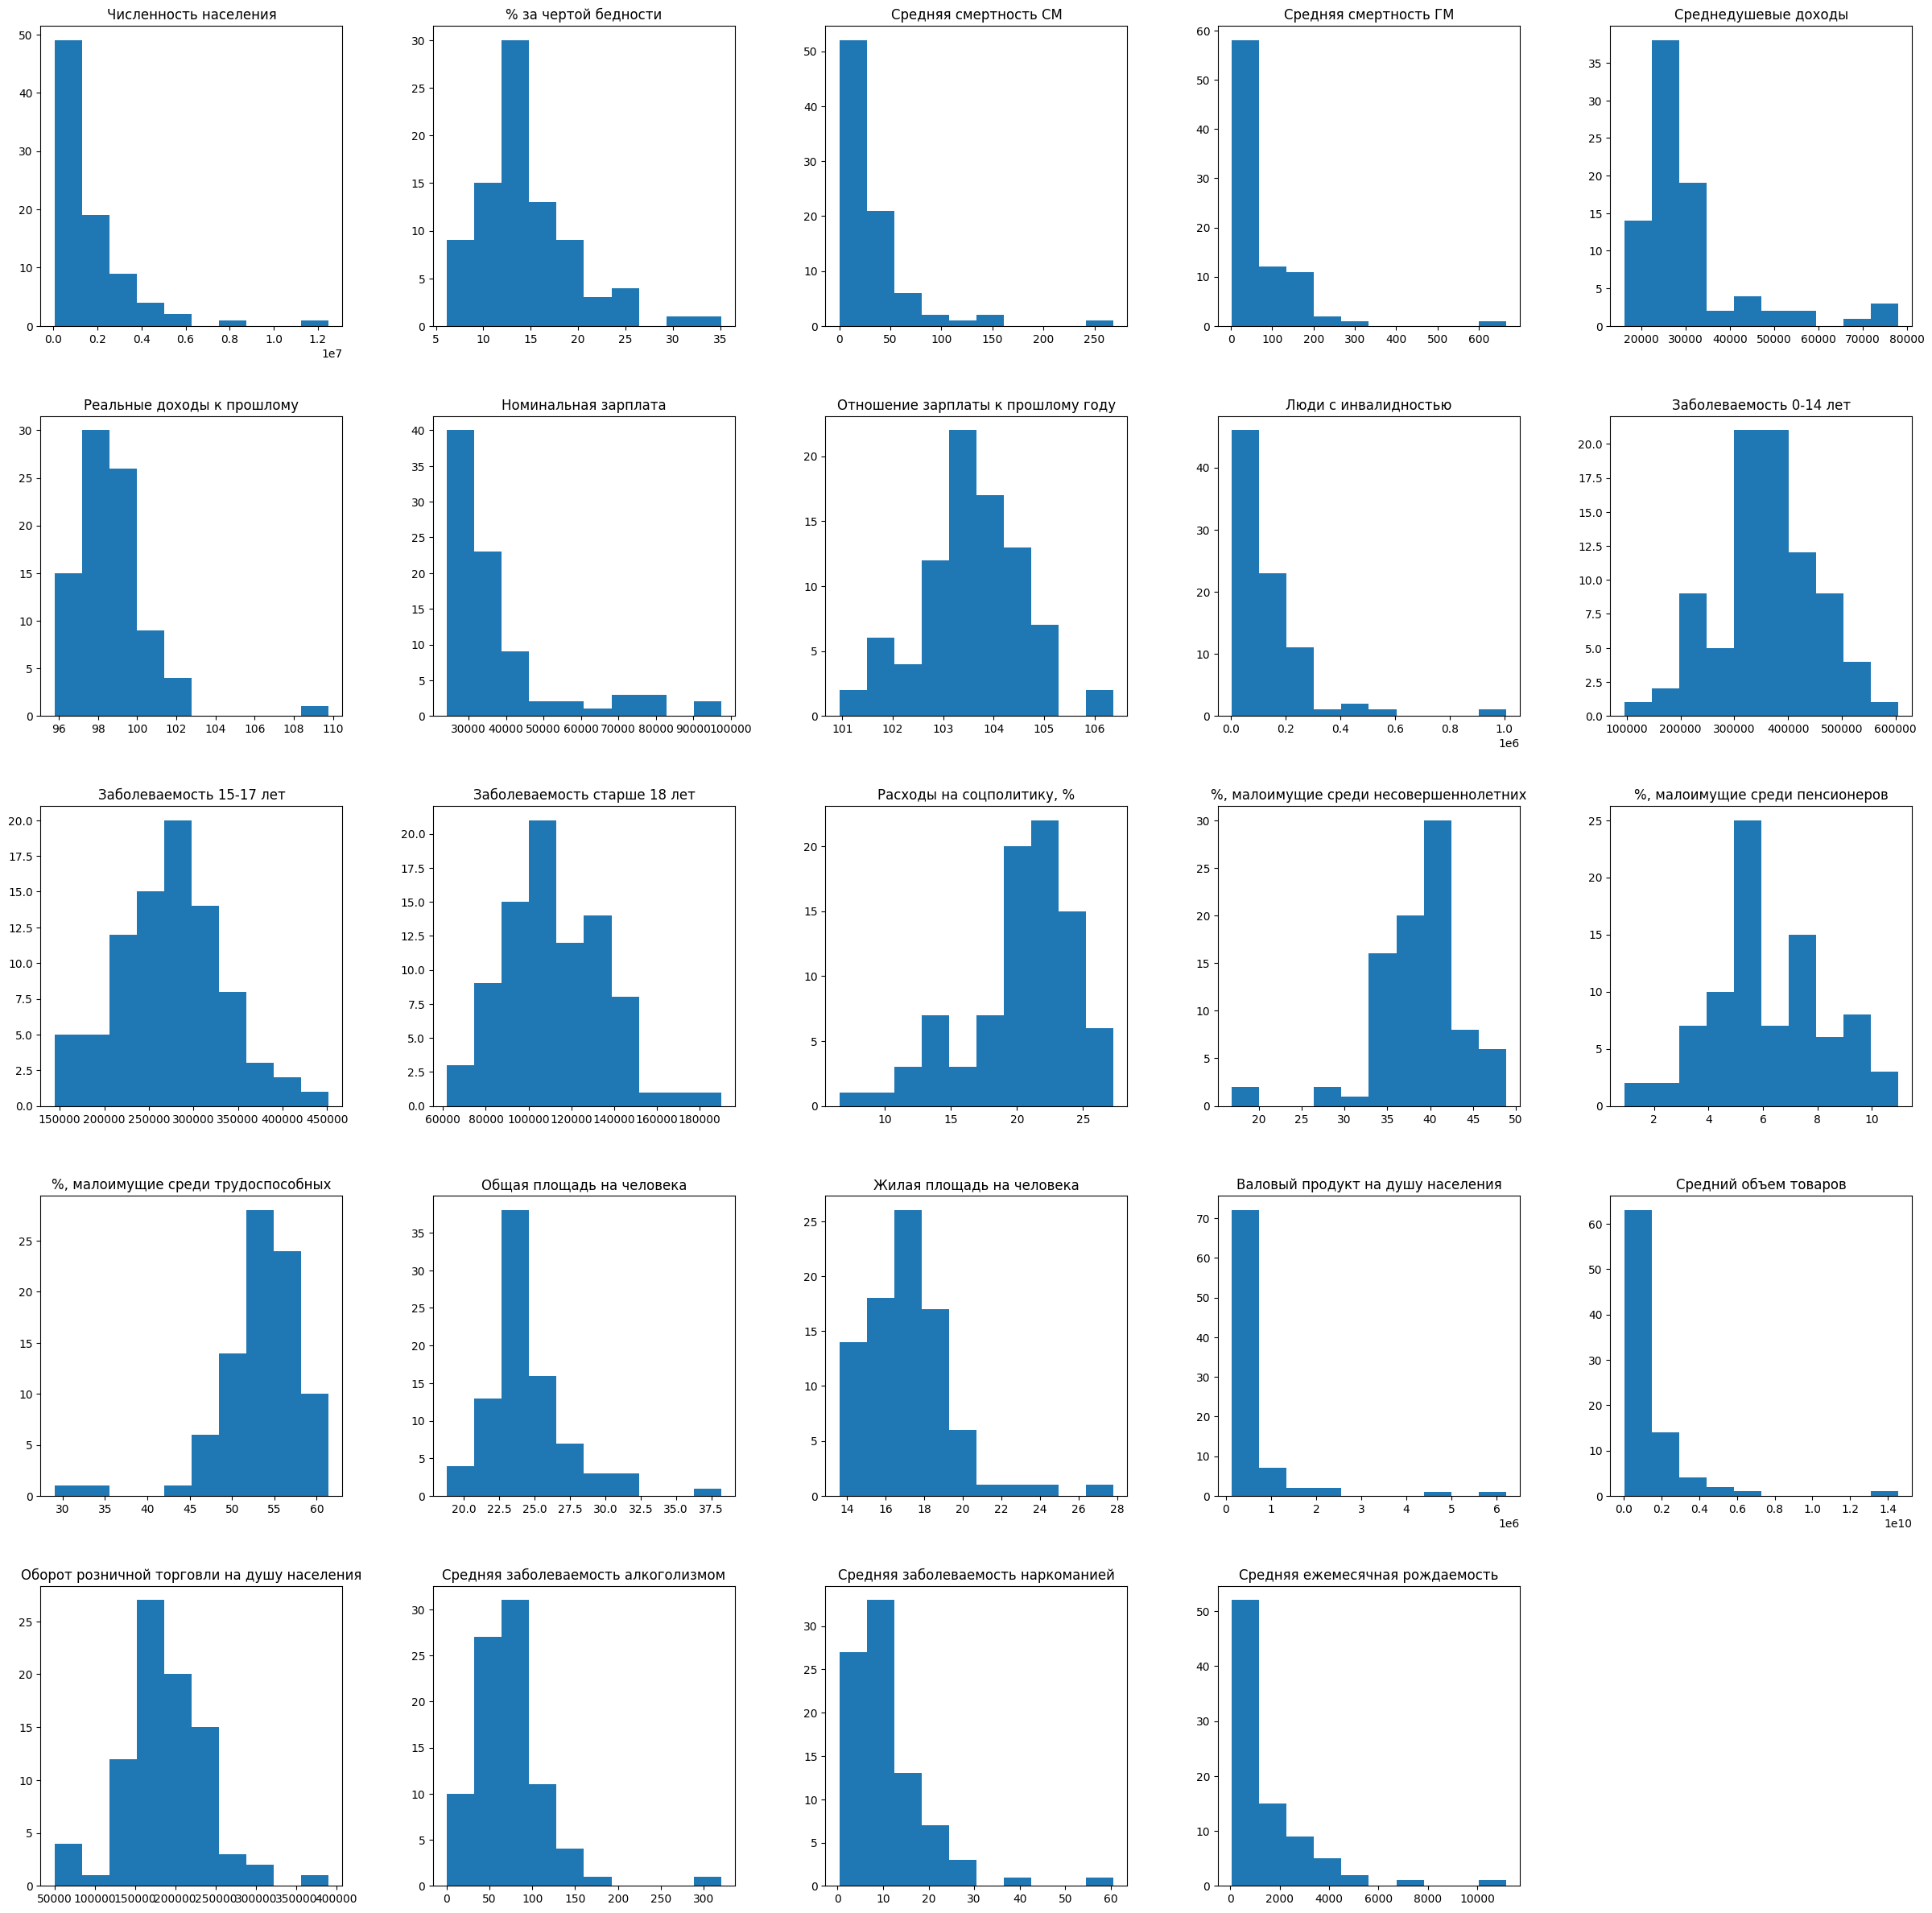

In [143]:
# Визуализируем распределение признаков
join_df.hist(figsize = (30,30), grid = False);
plt.show()

Полученные гистограммы несеметричны. В некоторых случаях присутствует мультимодальность. Это указывает на выраженную разделенность на кластеры.

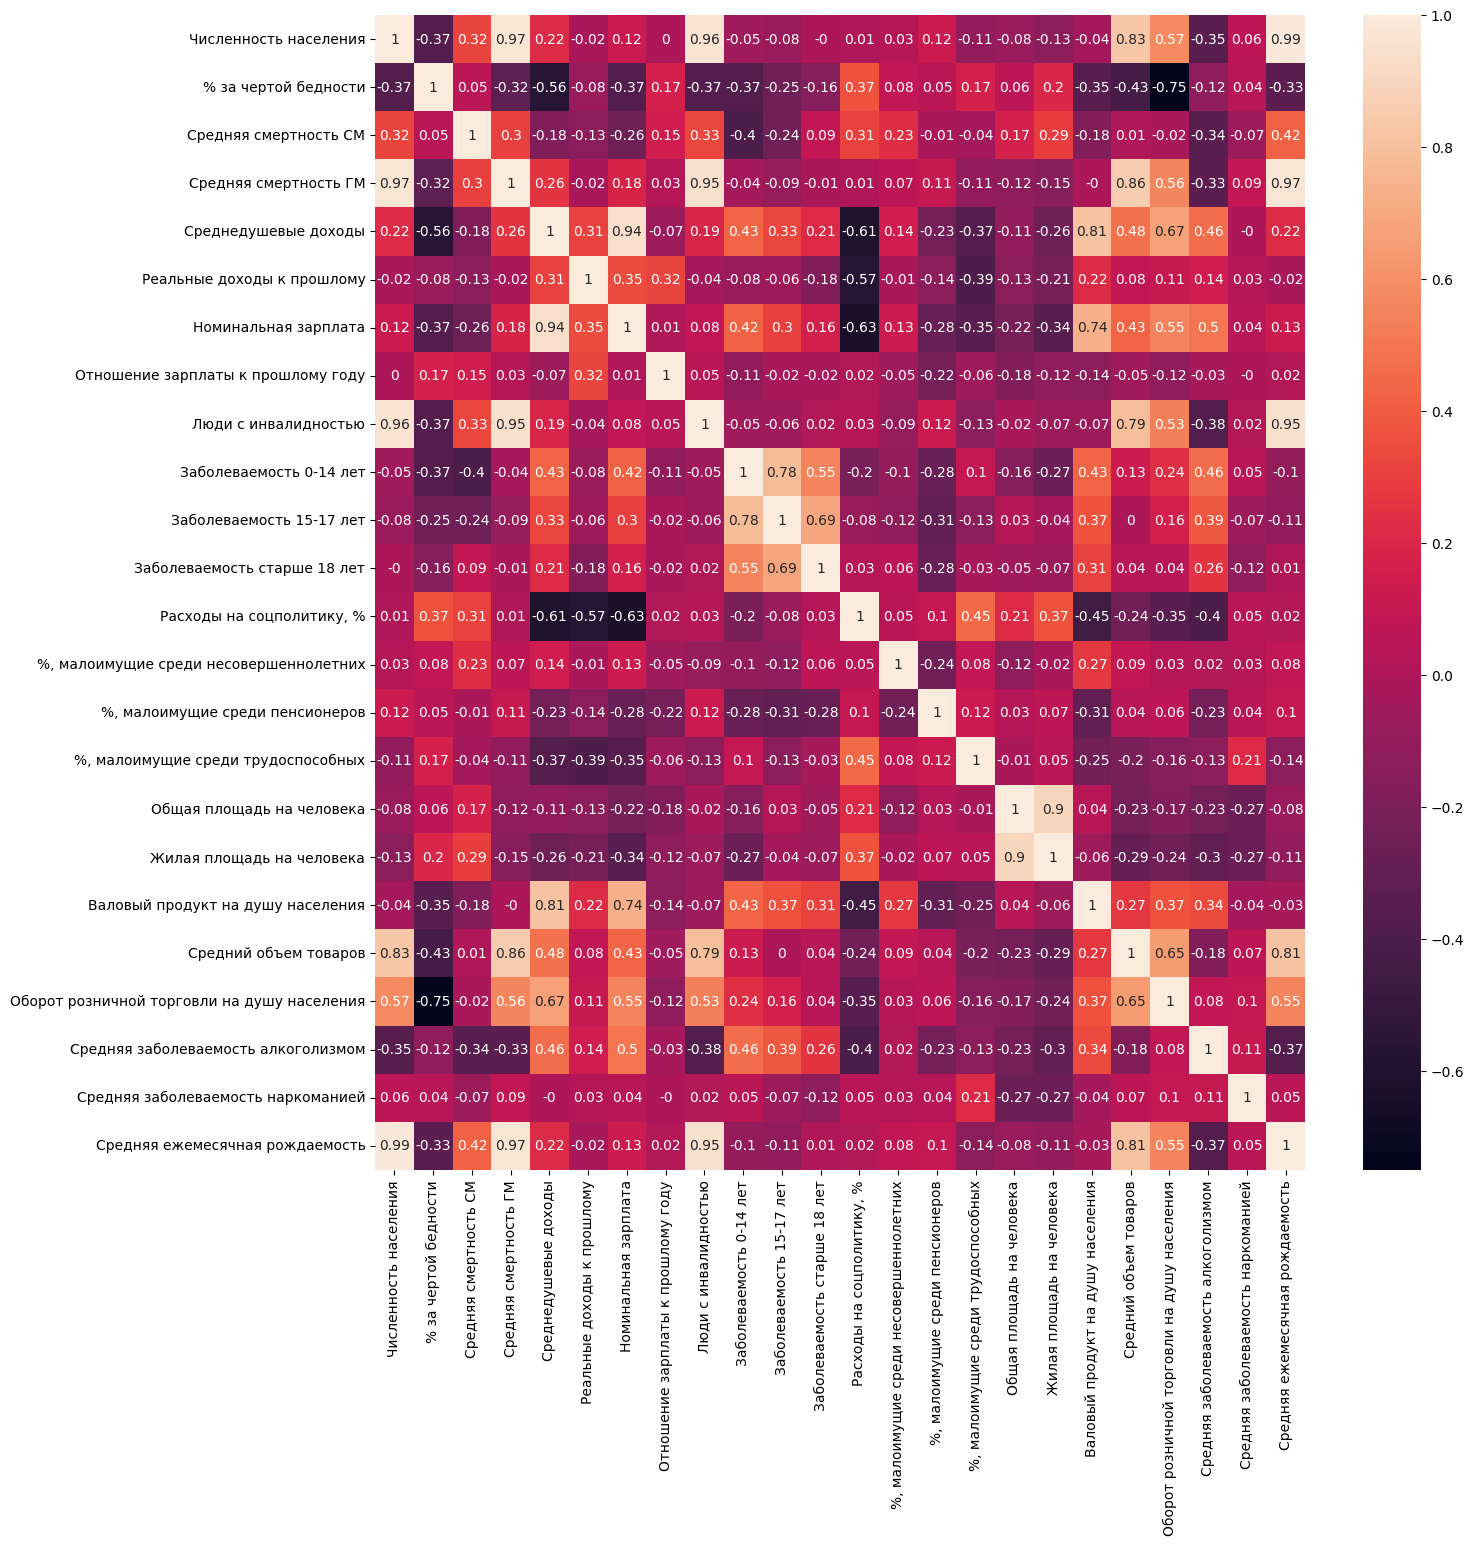

In [144]:
#создадим тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных
plt.figure(figsize=(15, 15))
sns.heatmap(join_df.corr().round(decimals=2), annot=True)
plt.show()

Довольно много признаков с абсолютной корреляцией. Уберем признаки с абсолютной и сильной связью для численности населения: средняя смертность ГМ, люди с инвалидностью, средняя ежемесячная рождаемость и средний объем товаров. Сильную связь между собой имеют показатели оборота розничной торговли на душу населения и процент живущих за чертой бедности, один из признаков также следует исключить. Абсолютно связаны между собой признаки среднедушевых доходов и номинальной зарплаты, что позволяет нам удалить один столбец. И наконец абсолютной связью обладают общая и жилая площадь на человека и здесь так же нужно исключить один признак.  

In [145]:
join_df = join_df.drop([
    'Средняя смертность ГМ', 'Люди с инвалидностью',
    'Средняя ежемесячная рождаемость', 'Средний объем товаров',
    'Оборот розничной торговли на душу населения',
    'Среднедушевые доходы', 'Валовый продукт на душу населения',
    'Общая площадь на человека'
    ], axis=1)

# 3. Кластеризация

Перед кластеризацией выполним нормализацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных.

In [146]:
from sklearn import preprocessing

#инициализируем метод MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

#копируем исходный датасет
df_mm = mm_scaler.fit_transform(join_df)

#создаем список признаков
col_names = list(join_df.columns)

#преобразуем промежуточный датасет в полноценный датафрейм
df_mm = pd.DataFrame(df_mm, columns=col_names, index=join_df.index)

df_mm

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
region,,,,,,,,,,,,,,,,
Алтайский край,0.184049,0.396780,0.252922,0.166310,0.005566,0.562500,0.514937,0.693888,1.000000,0.951846,0.646692,0.520833,0.841927,0.309859,0.303900,0.295681
Амурская область,0.060226,0.336975,0.071732,0.226981,0.229606,0.735294,0.581254,0.527512,0.345454,0.831461,0.666979,0.468254,0.838222,0.260563,0.307332,0.330565
Архангельская область,0.085263,0.262795,0.057917,0.148465,0.265128,0.566176,0.822971,0.797637,0.534792,0.683788,0.535893,0.649802,0.911392,0.232394,0.186895,0.114618
Астраханская область,0.077587,0.317424,0.068544,0.059243,0.104762,0.713235,0.338965,0.208101,0.239112,0.893258,0.728464,0.396825,0.798703,0.394366,0.075195,0.000000
Белгородская область,0.120612,0.058079,0.107864,0.261242,0.091849,0.595588,0.395528,0.592674,0.386143,0.366774,0.392322,0.727183,0.000000,0.295775,0.142590,0.031561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,0.039958,0.000000,0.061637,0.456817,0.943352,0.595588,0.758783,0.602686,0.669282,0.316212,0.963483,0.014881,0.685088,0.133803,0.331669,0.229236
Ярославская область,0.097442,0.150086,0.052072,0.116345,0.109536,0.238971,0.710994,0.412548,0.447983,0.692616,0.608614,0.434524,0.907379,0.154930,0.218097,0.181063
г. Москва,1.000000,0.040828,0.036132,0.293362,0.779096,0.636029,0.549064,0.267781,0.177833,0.502408,0.712235,0.880952,0.666564,0.014085,0.079563,0.179402


Выполним кластеризацию используя метод K-Means. Найдем необходимое число кластеров с помощью метода локтя.

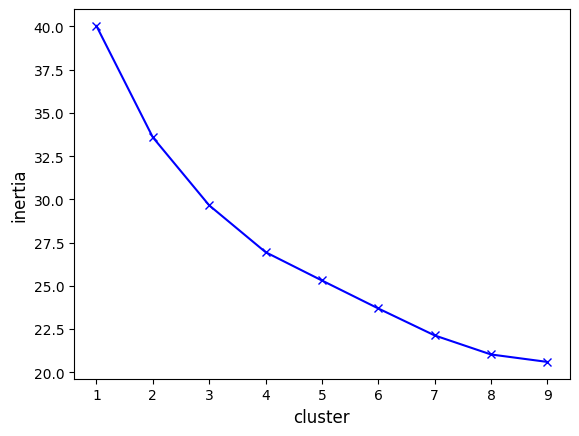

In [147]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу
# с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и
# сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, df_mm))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Поскольку метод локтя не дает определенного ответа, применим метод силуэта.

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

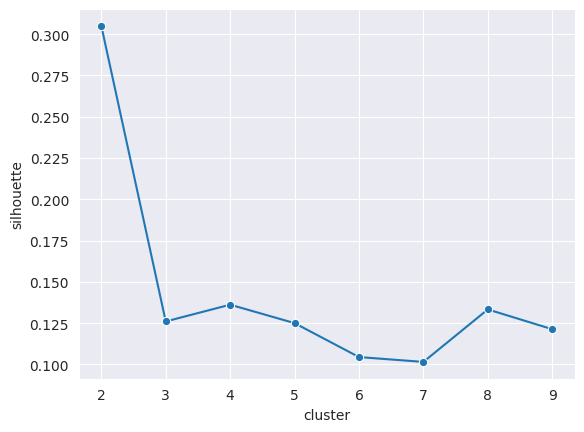

In [148]:
#импортируем метрику вичисления коэффициента силуэта
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию, которая будет проводить k_means кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_kmeans_clust(X, n_clusters):
    # запустим k-means кластеризацию
    kmeans_clustering = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    # обучим модель k-means кластеризации
    kmeans_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    kmeans_prediction = kmeans_clustering.labels_
    # вернём список с результатами
    return kmeans_prediction

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_km_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_kmeans_clust(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res, random_state=42)
    return silhouette

# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_km_clust(df_mm, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

Наиболее выраженный пик указывает, что оптимальным количеством кластеров будет четыре.

Проведем кластеризацию данных.

In [149]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(df_mm)

y_kmeans = kmeans.predict(df_mm)

# Назначим индекс для меток
df_mm['labels'] = pd.Series(y_kmeans, index=join_df.index)
df_mm['labels']

region
Алтайский край                     1
Амурская область                   1
Архангельская область              1
Астраханская область               3
Белгородская область               2
                                  ..
Ямало-Ненецкий автономный округ    0
Ярославская область                1
г. Москва                          2
г. Санкт-Петербург                 2
г. Севастополь                     2
Name: labels, Length: 85, dtype: int32

Рассмотрим краткую статистику по каждому из кластеров по отдельности.

In [150]:
#кластер 0
join_df[df_mm['labels']==0].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,5.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,383943.900,11.860000,12.028571,100.678000,81486.432000,103.276000,488402.520000,358842.710000,136721.170000,12.573333,43.1900,2.640000,47.490000,16.580000,157.960000,5.78000
std,387249.333,5.346554,11.975059,1.252466,13753.180224,1.225594,76901.070825,63344.303189,25204.882325,3.433568,6.5354,1.833698,8.480339,2.571381,95.893107,5.69886
min,44001.750,6.133333,1.000000,98.900000,65881.330000,101.540000,401377.300000,299158.550000,100051.950000,6.550000,32.6300,0.900000,33.130000,14.100000,73.200000,0.50000
25%,49923.125,8.500000,5.285714,100.370000,70722.830000,102.420000,444380.600000,318342.150000,124241.100000,13.116667,41.5500,1.050000,48.270000,15.500000,106.400000,1.70000
50%,314472.625,9.766667,6.428571,100.420000,80050.500000,104.020000,482303.100000,329562.700000,146049.300000,13.933333,45.2000,2.830000,49.380000,15.900000,136.400000,3.60000
75%,541716.875,16.150000,16.571429,101.530000,93313.330000,104.180000,508488.750000,395205.800000,147662.800000,14.283333,47.7000,3.000000,51.220000,16.500000,153.200000,8.90000
max,969605.125,18.750000,30.857143,102.170000,97464.170000,104.220000,605462.850000,451944.350000,165600.700000,14.983333,48.8700,5.420000,55.450000,20.900000,320.600000,14.20000


In [151]:
#кластер 1
join_df[df_mm['labels']==1].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.722880e+06,14.610684,32.062271,98.019231,32750.504615,103.648718,402310.030769,301175.439744,123903.930769,22.261538,39.078974,5.709487,55.210513,16.892308,76.694872,11.876923
std,1.096954e+06,3.057130,26.244590,1.143665,6772.074075,1.007621,60179.195922,39141.484231,18898.903624,2.064693,2.823855,1.367104,2.443956,1.673852,22.092627,8.020975
min,2.181868e+05,9.550000,1.428571,95.770000,24598.000000,100.960000,302150.550000,217407.000000,89661.400000,17.266667,32.900000,3.250000,50.700000,14.200000,30.200000,1.600000
25%,8.373600e+05,13.175000,15.714286,97.235000,27314.420000,103.190000,354147.125000,272104.450000,108293.975000,20.958333,37.390000,4.940000,53.750000,16.000000,61.250000,6.100000
50%,1.275789e+06,14.033333,22.714286,98.100000,31826.170000,103.760000,394694.550000,294273.950000,127472.450000,22.150000,39.470000,5.550000,54.780000,16.900000,73.700000,9.700000
75%,2.418966e+06,15.708333,43.285714,98.880000,35279.085000,104.220000,449552.800000,326356.475000,133563.000000,23.750000,40.950000,6.500000,56.480000,17.650000,96.050000,16.200000
max,4.311608e+06,24.650000,135.571429,100.170000,56300.330000,106.380000,516071.750000,409808.250000,190105.000000,26.316667,45.380000,9.500000,61.420000,24.100000,121.300000,42.300000


In [152]:
#кластер 2
join_df[df_mm['labels']==2].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.114151e+06,9.280556,14.998016,100.853333,51606.916667,103.486667,357927.354167,262285.529167,103808.500000,14.415278,35.316667,7.639167,48.705833,15.416667,67.383333,11.741667
std,3.705232e+06,2.089329,17.271417,3.052860,20623.973629,1.390522,47837.257418,51522.782933,19200.149335,2.610898,9.659452,2.173767,7.441908,1.444635,42.035501,6.441408
min,1.427826e+05,7.050000,0.000000,98.220000,29421.500000,100.940000,296834.000000,191034.750000,67322.300000,9.883333,16.830000,3.270000,29.030000,13.700000,18.800000,2.300000
25%,8.707073e+05,7.504167,4.071429,99.360000,33587.502500,102.695000,331573.175000,235840.425000,91147.637500,12.587500,32.962500,6.962500,46.960000,13.875000,43.575000,9.250000
50%,1.602432e+06,9.033333,8.773810,99.915000,45303.830000,103.670000,346476.050000,259957.875000,106683.225000,14.508333,37.935000,8.015000,50.550000,15.550000,56.650000,9.900000
75%,4.245334e+06,10.362500,19.892857,101.155000,70861.707500,104.685000,382380.937500,281595.587500,112073.737500,16.333333,41.117500,8.927500,53.700000,16.400000,82.300000,13.625000
max,1.249984e+07,13.683333,57.571429,109.780000,82467.500000,105.160000,466280.850000,365418.950000,144587.150000,18.433333,46.720000,10.630000,56.420000,17.800000,162.300000,27.200000


In [153]:
#кластер 3
join_df[df_mm['labels']==3].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.378878e+06,17.243678,43.059113,98.485172,30915.327586,103.577931,275605.372414,224004.332759,93001.770690,21.609195,38.320000,6.805172,54.014828,18.324138,58.010345,10.286207
std,1.139027e+06,6.273020,54.769468,1.400917,6352.202704,0.927660,69641.278401,43860.690451,14453.990149,2.851812,4.325938,2.153964,3.460698,2.692006,31.974480,11.357022
min,1.611585e+05,8.833333,8.857143,96.470000,24190.170000,101.860000,94886.750000,143922.100000,61771.550000,13.066667,27.020000,1.950000,46.030000,13.600000,0.100000,0.400000
25%,6.989192e+05,13.033333,12.714286,97.730000,25865.500000,103.020000,229935.750000,202353.300000,84943.600000,20.266667,34.920000,5.250000,51.100000,16.900000,44.300000,4.500000
50%,1.068086e+06,15.333333,21.000000,98.250000,29162.170000,103.460000,266276.000000,228138.150000,90820.650000,21.233333,38.880000,6.650000,54.880000,18.300000,57.000000,7.400000
75%,1.501524e+06,19.583333,38.000000,99.150000,34592.330000,103.900000,329402.150000,245023.050000,103307.650000,22.966667,40.170000,8.020000,55.920000,19.400000,78.400000,11.100000
max,5.604565e+06,35.116667,268.857143,102.580000,45182.330000,106.260000,380740.800000,336526.500000,123097.150000,27.316667,46.580000,10.980000,59.600000,27.800000,133.900000,60.600000


Приведенная статистика показывает, что регионы кластера 0 характеризуются крайне низкой численностью населения, самой высокой заболеваемостью во всех возрастных группах и кратно большей заболеваемостью алкоголизмом. При этом для данного кластера характерны самая высокая номинальная зарплата, низкая заболеваемость наркоманией и самый низкий процент малоимущих среди пенсионеров и работоспособного населения.  
Кластер 1 характеризуется самыми высокими расходами на социальную политику, при этом здесь наибольший процент малоимущих работоспособного возраста и заболевших наркоманией.  
Для кластера 2 характерны наибольшая чесленность населения и наименьший процент людей находящихся за чертой бедности. Так же здесь наименьшая жилая площадь на человека и наибольший процент малоимущих среди пенсионеров.  
Кластер 3 охватывает регионы с наибольшим процентом людей за чертой бедности, с крайне высокой смертностью среди сельского населения, а так же с наименьшей номинальной зарплатой. При этом в данной группе регионов самая низкая заболеваемость во всех возрастных группах и наименьший показатель выявленных случаев алкоголизма.

Расмотрим кластер с наиболее благоприятными по номинальной зарплате регионами.

In [154]:
join_df[df_mm['labels']==0]

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
region,,,,,,,,,,,,,,,,
Камчатский край,314472.625,16.150000,6.428571,100.42,70722.83,104.22,401377.30,318342.15,100051.95,13.933333,41.55,3.00,55.45,15.9,73.2,8.9
Ненецкий автономный округ,44001.750,9.766667,1.000000,98.90,80050.50,101.54,605462.85,451944.35,165600.70,14.983333,48.87,2.83,48.27,20.9,136.4,1.7
Республика Саха (Якутия),969605.125,18.750000,30.857143,100.37,65881.33,102.42,444380.60,299158.55,124241.10,14.283333,45.20,5.42,49.38,16.5,153.2,3.6
Чукотский автономный округ,49923.125,8.500000,5.285714,101.53,97464.17,104.02,508488.75,395205.80,146049.30,6.550000,32.63,0.90,33.13,14.1,320.6,0.5
Ямало-Ненецкий автономный округ,541716.875,6.133333,16.571429,102.17,93313.33,104.18,482303.10,329562.70,147662.80,13.116667,47.70,1.05,51.22,15.5,106.4,14.2


Ожидаемо, в кластер 0 вошли регионы в которых широко преставлена добывающая отрасаль. В целом по кластеру выделяется высокая заболеваемость детей до 14 лет в Ненецком и Чукотском автономных округах. Так же для Чукотского АО характерна высочайшая заболеваемость алкоголизмом, при почти нулевой заболеваемости наркоманией.  
Но только ли экономические показатели кластеризуют регионы? Можно ли выделить другие признаки, не связанные с экономикой, но влияющие на уровень благополучия? Возможно, есть смысл понизить размерность данных.

In [155]:
# Применение метода главных компонент Principal Component Analysis
from sklearn.decomposition import PCA

# Скопируем признаки без меток
df_pca = df_mm.drop(['labels'], axis=1)
df_pca

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
region,,,,,,,,,,,,,,,,
Алтайский край,0.184049,0.396780,0.252922,0.166310,0.005566,0.562500,0.514937,0.693888,1.000000,0.951846,0.646692,0.520833,0.841927,0.309859,0.303900,0.295681
Амурская область,0.060226,0.336975,0.071732,0.226981,0.229606,0.735294,0.581254,0.527512,0.345454,0.831461,0.666979,0.468254,0.838222,0.260563,0.307332,0.330565
Архангельская область,0.085263,0.262795,0.057917,0.148465,0.265128,0.566176,0.822971,0.797637,0.534792,0.683788,0.535893,0.649802,0.911392,0.232394,0.186895,0.114618
Астраханская область,0.077587,0.317424,0.068544,0.059243,0.104762,0.713235,0.338965,0.208101,0.239112,0.893258,0.728464,0.396825,0.798703,0.394366,0.075195,0.000000
Белгородская область,0.120612,0.058079,0.107864,0.261242,0.091849,0.595588,0.395528,0.592674,0.386143,0.366774,0.392322,0.727183,0.000000,0.295775,0.142590,0.031561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,0.039958,0.000000,0.061637,0.456817,0.943352,0.595588,0.758783,0.602686,0.669282,0.316212,0.963483,0.014881,0.685088,0.133803,0.331669,0.229236
Ярославская область,0.097442,0.150086,0.052072,0.116345,0.109536,0.238971,0.710994,0.412548,0.447983,0.692616,0.608614,0.434524,0.907379,0.154930,0.218097,0.181063
г. Москва,1.000000,0.040828,0.036132,0.293362,0.779096,0.636029,0.549064,0.267781,0.177833,0.502408,0.712235,0.880952,0.666564,0.014085,0.079563,0.179402


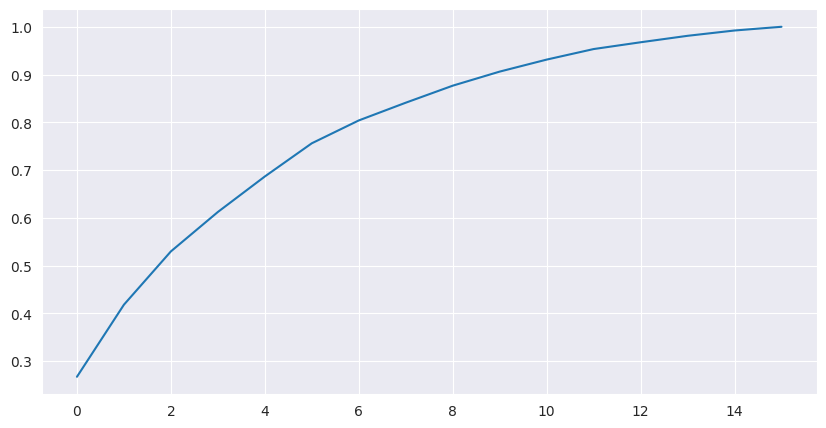

In [156]:
# Передадим признаки в метод
pca = PCA().fit(df_pca)
# Построим график зависимости доли объясненной дисперсии от числа индикаторов
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.gcf().set_size_inches(10,5)
plt.grid(True)

Из графика видим, что больше 95% объясненной дисперсии зависит от 12 признаков из используемых 16. Попробуем проверить на сколько сильна связь уровня бедности и социального неблагополучия  с производством и потреблением в регионе. Исключим сильно коррелирующие с данными показателями признаки, т.е. фактически избавимся от всех экономических показателей.

In [157]:
# Понизим размерность признаков и оставим признаки не связанные с экономикой
df_res = join_df[[
    'Численность населения', '% за чертой бедности',
    'Средняя смертность СМ', 'Заболеваемость 0-14 лет',
    'Заболеваемость 15-17 лет', 'Заболеваемость старше 18 лет',
    '%, малоимущие среди несовершеннолетних',
    '%, малоимущие среди пенсионеров',
    '%, малоимущие среди трудоспособных',
    'Жилая площадь на человека',
    'Средняя заболеваемость алкоголизмом',
    'Средняя заболеваемость наркоманией'
    ]]
print(df_res.shape)

(85, 12)


In [158]:
# Снова выполним кластеризацию с новым набором признаков
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(df_res)

y_kmeans = kmeans.predict(df_res)

# Pададим индекс для меток
df_res['labels'] = pd.Series(y_kmeans, index=join_df.index)
df_res['labels']

/tmp/ipykernel_5613/715338958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['labels'] = pd.Series(y_kmeans, index=join_df.index)


region
Алтайский край                     0
Амурская область                   2
Архангельская область              2
Астраханская область               2
Белгородская область               2
                                  ..
Ямало-Ненецкий автономный округ    2
Ярославская область                2
г. Москва                          3
г. Санкт-Петербург                 1
г. Севастополь                     2
Name: labels, Length: 85, dtype: int32

In [159]:
#кластер 0
join_df[df_res['labels']==0].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.539220e+06,14.293860,59.556391,98.413684,32863.614737,103.761053,346152.310526,267883.902632,114851.555263,22.119298,38.580526,5.753158,53.907895,17.610526,64.494737,15.094737
std,4.938417e+05,2.914042,54.146959,1.815355,5785.481282,0.917108,72784.232744,47983.800302,27355.886437,3.409058,5.737010,1.038990,3.416313,1.693417,28.585301,9.322820
min,1.836021e+06,9.033333,16.857143,96.220000,24190.170000,101.900000,229935.750000,183071.000000,74748.000000,13.066667,16.830000,3.250000,42.070000,15.700000,14.800000,4.000000
25%,2.145602e+06,13.275000,36.500000,97.090000,28824.750000,103.280000,311005.750000,231671.775000,91673.575000,21.350000,38.215000,5.250000,52.940000,16.300000,43.700000,8.550000
50%,2.510337e+06,14.216667,45.285714,97.950000,31838.170000,103.740000,350473.750000,273031.750000,115248.300000,21.700000,39.470000,5.600000,54.420000,17.000000,57.400000,14.700000
75%,2.831272e+06,15.508333,63.214286,99.165000,35279.085000,104.210000,385823.500000,300165.325000,128902.675000,25.058333,41.600000,6.185000,55.900000,18.500000,88.600000,18.900000
max,3.474611e+06,19.583333,268.857143,102.580000,44275.830000,106.260000,491608.950000,357655.150000,190105.000000,26.316667,43.880000,7.800000,58.400000,22.500000,113.600000,42.300000


In [160]:
#кластер 1
join_df[df_res['labels']==1].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.987448e+06,9.730952,70.612245,98.935714,38815.310000,103.362857,337250.550000,275961.657143,117997.600000,18.778571,38.237143,6.084286,50.914286,16.600000,42.557143,9.871429
std,1.298954e+06,2.637206,49.376708,1.508596,10204.754917,0.845650,66736.711233,45721.641475,15390.177102,3.952984,9.336621,1.985001,3.328417,1.310216,19.840519,4.037208
min,3.885667e+06,7.050000,0.000000,96.930000,30170.670000,102.500000,243191.900000,217407.000000,102631.400000,12.050000,17.430000,3.270000,46.000000,14.800000,18.800000,4.000000
25%,4.127701e+06,7.358333,41.142857,97.825000,32306.000000,102.760000,315636.900000,256493.575000,105579.150000,17.083333,40.240000,4.815000,48.880000,15.750000,25.100000,7.850000
50%,4.311608e+06,9.550000,57.571429,99.400000,34007.670000,103.200000,327571.400000,274202.450000,114315.300000,18.833333,40.880000,5.500000,51.100000,16.200000,45.300000,10.000000
75%,5.464451e+06,11.566667,109.428571,99.710000,42992.580000,103.810000,346217.950000,280858.025000,126645.525000,21.191667,41.910000,7.835000,53.420000,17.750000,58.400000,11.900000
max,7.530557e+06,13.666667,135.571429,101.150000,56931.670000,104.700000,466280.850000,365418.950000,144587.150000,24.016667,45.050000,8.520000,54.700000,18.200000,66.800000,15.600000


In [161]:
#кластер 2
join_df[df_res['labels']==2].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,8.760720e+05,15.405747,19.029146,98.795862,38329.927931,103.532414,363912.320690,274753.055172,109756.142241,20.034770,38.530517,6.262241,53.625690,17.129310,81.429310,9.727586
std,4.142355e+05,5.534738,18.968472,2.014073,18210.706534,1.104363,98286.472934,64785.554044,22761.905589,4.247943,4.496280,2.349252,5.463846,2.512147,45.036157,9.125341
min,4.400175e+04,6.133333,0.000000,95.770000,24490.830000,100.940000,94886.750000,143922.100000,61771.550000,6.550000,27.020000,0.900000,29.030000,13.600000,0.100000,0.400000
25%,5.571858e+05,11.945833,10.821429,97.997500,26807.375000,102.960000,308724.612500,238541.125000,91480.487500,18.837500,35.045000,4.900000,51.572500,15.500000,59.475000,5.050000
50%,9.556904e+05,14.025000,16.214286,98.560000,30587.250000,103.560000,372005.975000,271086.625000,107857.450000,20.825000,38.125000,5.700000,54.880000,16.900000,73.700000,8.000000
75%,1.195654e+06,18.200000,21.000000,99.405000,40061.877500,104.180000,421524.437500,317642.475000,128150.975000,22.925000,40.317500,7.787500,56.210000,18.100000,96.125000,11.250000
max,1.658544e+06,35.116667,142.000000,109.780000,97464.170000,106.380000,605462.850000,451944.350000,165600.700000,27.316667,48.870000,10.980000,61.420000,27.800000,320.600000,60.600000


In [162]:
#кластер 3
join_df[df_res['labels']==3].describe()

,Численность населения,% за чертой бедности,Средняя смертность СМ,Реальные доходы к прошлому,Номинальная зарплата,Отношение зарплаты к прошлому году,Заболеваемость 0-14 лет,Заболеваемость 15-17 лет,Заболеваемость старше 18 лет,"Расходы на соцполитику, %","%, малоимущие среди несовершеннолетних","%, малоимущие среди пенсионеров","%, малоимущие среди трудоспособных",Жилая площадь на человека,Средняя заболеваемость алкоголизмом,Средняя заболеваемость наркоманией
count,1.0,1.000000,1.000000,1.00,1.00,1.0,1.0,1.00,1.0,1.000000,1.00,1.00,1.00,1.0,1.0,1.0
mean,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2
25%,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2
50%,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2
75%,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2
max,12499841.0,7.316667,9.714286,99.88,81277.67,104.4,375225.5,226404.75,84593.5,16.983333,39.65,9.78,50.62,13.8,25.6,11.2


Новая кластеризация разбила регионы с ярко выраженным отличием по заболеваемости алкоголизмом, численности населения и смертности в сельской местности. Признаки заболеваемости и доли малоимущих для новой кластеризации практически слились и стали приемерно равны между кластерами.  При этом, несмотря на то что экономические показатели не влияли на разделение, признаки, показывающие процент живущих за чертой бедности и номинальную заработную плату, сохранили прежнюю сильно выраженную стратификацию. Особенно это заметно на примере Москвы, которая сама по себе выделилась в отдельный кластер 3. Это говорит о том, что уровень бедности и социального неблагополучия связан с производством и потреблением в регионе.   

# 4. Выводы

Состав 0 кластера:

In [163]:
cluster_0 = list(join_df[df_res['labels']==0].index)
print (', '.join(cluster_0))

Алтайский край, Волгоградская область, Воронежская область, Иркутская область, Кемеровская область, Красноярский край, Ленинградская область, Нижегородская область, Новосибирская область, Омская область, Оренбургская область, Пермский край, Приморский край, Республика Дагестан, Республика Крым, Самарская область, Саратовская область, Ставропольский край, Челябинская область


Данный кластер включает в себя регионы с наименьшим количеством населения. Номинальные зарплаты в данной группе так же минимальны, а расходы на социальную политику выше чем где-либо, что отражает низкое экономическое развитие регионов. Наибольший процент малоимущих среди работоспособного населения указывает на высокую безработицу и низкооплачиваемую работу для местного население. Как следствие жилая площадь на человека здесь самая большая т.к. субъекты данного кластера не притягивают к себе людей из других частей страны и жилье скорее всего является дешевым, но не пользуется спросом. Так же негативными факторами являются самая высокая заболеваемость наркоманией, высокая заболеваемость алкоголизмом, большая детская смертность в сельской местности и то что каждый седьмой житель здесь находится за чертой бедности.   

In [164]:
cluster_1 = list(join_df[df_res['labels']==1].index)
print (', '.join(cluster_1))

Краснодарский край, Московская область, Республика Башкортостан, Республика Татарстан, Ростовская область, Свердловская область, г. Санкт-Петербург


В целом по кластеру довольно неплохие показатели благосостояния населения. К негативным факторам относятся самая большая детская смертность в сельской местности и высочайший уровень заболеваемости населения всех возрастных групп. Вероятнее всего руководству данных субъектов нужно задуматься об улучшениях в области здравоохранения.

In [165]:
cluster_2 = list(join_df[df_res['labels']==2].index)
print (', '.join(cluster_2))

Амурская область, Архангельская область, Астраханская область, Белгородская область, Брянская область, Владимирская область, Вологодская область, Еврейская автономная область, Забайкальский край, Ивановская область, Кабардино-Балкарская Республика, Калининградская область, Калужская область, Камчатский край, Карачаево-Черкесская Республика, Кировская область, Костромская область, Курганская область, Курская область, Липецкая область, Магаданская область, Мурманская область, Ненецкий автономный округ, Новгородская область, Орловская область, Пензенская область, Псковская область, Республика Адыгея, Республика Алтай, Республика Бурятия, Республика Ингушетия, Республика Калмыкия, Республика Карелия, Республика Коми, Республика Марий Эл, Республика Мордовия, Республика Саха (Якутия), Республика Северная Осетия - Алания, Республика Тыва, Республика Хакасия, Рязанская область, Сахалинская область, Смоленская область, Тамбовская область, Тверская область, Томская область, Тульская область, Тю

Кластер 2 показывает высший процент находящихся за чертой бедности и одни из самых крупных расходов на социальную политику. В данный кластер входит наибольшее количество регионов, население которых, в основном, кратно больше (не считая Москвы), чем в остальных частях страны. Интересно, что при самой большой заболеваемости алкоголизмом здесь самая низкая заболеваемость наркоманией.

In [166]:
cluster_3 = list(join_df[df_res['labels']==3].index)
print (', '.join(cluster_3))

г. Москва


Вполне закономерно, что столица, выделившись в отдельный кластер, выглядит самым благоприятным субъектом. Такие показатели как процент живущих за чертой бедности, номинальная зарплата и заболеваемость алкоголизмом представляют Москву в особо выгодном свете. Жилье здесь дорогое, поэтому жилая площадь на человека несколько скромнее чем по остальным субъектам РФ. К негативным моментам данного кластера можно отнести самый большой процент малоимущих среди пенсионеров. Отдельно внимание привлекает тот факт, что в возрасте до 14 лет москвичи болеют больше чем в целом население страны, однако для категории старше 18 лет этот показатель заболеваемости наборот выглядит наиболее благоприятным, что возможно говорит о слишком высоком темпе жизни при котором "некогда болеть".  

В целом из проведенногом иследования можно сделать сделать следующие выводы:
* наиболее науждающимися в помощи малообеспеченным/неблагополучным
слоям населения являются регионы входящие в 0 и 2 кластеры.
* для самых неблагоприятных регионов характерны большие показатели заболеваемости алкоголизмом и наркоманией, а так же низкие заработки и большие расходы на социальную политику.
* в целом число людей с инвалидностью, детей, пенсионеров не влияет на уровень бедности, т.к. данные показатели просто коррелируют с численностью населения.
* в первую очередь на благополучие влияют показатели производства и потребления в регионе, которые абсолютно связаны с уровнем дохода населения.
* чем благополучней регион, тем меньше приходится жилой площади на одного человека.